# Converting MATLAB code for Bayesian network structure learning using MCMC to Python, and extending it to implement a Gibbs sampler.

## اهمیت شبکه‌های بیزی (Bayesian Networks - BNs)


<div dir="rtl" style="text-align: right;">

---


شبکه‌های بیزی مدل‌های گرافیکی احتمالاتی هستند که برای نمایش، تحلیل، و استنتاج روابط احتمالی و وابستگی بین متغیرها استفاده می‌شوند. هر گره نشان‌دهنده یک متغیر و هر یال (پیکان) بیانگر وابستگی شرطی یا رابطه علی بین دو متغیر است. ساختار این شبکه‌ها به‌صورت گراف جهت‌دار بدون دور (DAG) است.

---

### دلایل اهمیت شبکه‌های بیزی

#### ۱. **تحلیل ساختاری روابط پیچیده**
شبکه‌های بیزی ابزار قدرتمندی برای مدل‌سازی روابط میان متغیرهای مختلف در سامانه‌های واقعی هستند. این شبکه‌ها امکان کشف و بیان وابستگی‌های مستقیم و غیرمستقیم، به‌ویژه روابط علیتی را فراهم می‌کنند؛ موضوعی که در بسیاری از علوم، از جمله پزشکی و حقوق، اهمیت بالایی دارد.

#### ۲. **تفسیرپذیری و شفافیت**
یکی از مهمترین مزایای شبکه‌های بیزی، تفسیر راحت آن‌ها است. ساختار شبکه (اتصالات و روابط) به صورت بصری و قابل فهم نمایش داده می‌شود و بنابراین فرایند استنتاج برای تصمیم‌گیرندگان و کارشناسان قابل پیگیری و دفاع است.

#### ۳. **استنتاج و به‌روزرسانی باورها**
این شبکه‌ها امکان انجام استنتاج احتمالاتی را به صورت کارآمد و سریع فراهم می‌کنند. یعنی با مشاهده بعضی اطلاعات (مثلاً علائم بیماری یا شواهد در پرونده)، می‌توان باور (احتمال) خود را نسبت به سایر متغیرها (مثلاً تشخیص بیماری یا وقوع جرم) به روز کرد.

#### ۴. **مقابله با داده‌های ناقص و غیرقطعی**
در دنیای واقعی داده‌ها معمولاً ناقص، گمشده یا همراه با عدم قطعیت هستند. شبکه‌های بیزی به دلیل استفاده از استقلال شرطی و ساختار خود، بدون نیاز به داده کامل می‌توانند تحلیل و استنتاج قابل‌ اعتماد انجام دهند.

#### ۵. **یادگیری ساختار و دانش اولیه**
شبکه‌های بیزی می‌توانند هم بر اساس داده (Data-Driven) و هم با تلفیق دانش خبره (Expert Knowledge) ساختار یاد بگیرند یا بهینه شوند، به همین دلیل برای کاربردهای جدید یا حوزه‌هایی با داده کم هم کاربردی‌اند.

---

### کاربردهای کلیدی

- **تشخیص پزشکی:**  
  شبکه‌های بیزی در سیستم‌های پشتیبان تصمیم پزشکی محبوب‌اند؛ می‌توانند با ترکیب داده بیمار و دانش پزشک، تشخیص‌های محتمل یا درمان بهینه را پیشنهاد دهند (مثلاً سیستم‌هایی مثل Pathfinder و QMR-DT).
- **سیستم‌های توصیه‌گر:**  
  در تجارت الکترونیک، محتوا، یا بازارهای سرمایه‌ای، این شبکه‌ها روابط میان ویژگی‌های کاربر، کالا و ترجیحات را مدل کرده و پیشنهادهای شخصی‌سازی‌شده تولید می‌کنند.
- **تحلیل داده‌های پیچیده:**  
  در مباحث حقوقی، بازار سرمایه، ژنتیک، تحلیل شبکه‌های اجتماعی و علوم داده، شبکه‌های بیزی ساختار علی و احتمالاتی داده‌های بزرگ و پیچیده را آشکار می‌سازند و اعتبار تحلیل‌ها را افزایش می‌دهند.
- **ارزیابی ریسک و تصمیم‌گیری:**  
  کاربرد گسترده در مهندسی، مدیریت پروژه، یا پرونده‌های قانونی برای مدل‌سازی نتایج و تصمیم‌گیری در شرایط عدم قطعیت.

---

### چالش‌های یادگیری ساختار

1. **فضای جستجوی متنابه و انفجاری:**
   - تعداد ساختارهای ممکن (گراف‌های جهت‌دار بدون چرخه، DAG) با افزایش تعداد متغیرها به‌صورت نمایی رشد می‌کند.
   - برای n متغیر، تعداد DAGهای ممکن فوق‌العاده زیاد است (مثلاً برای ۵ متغیر بیش از 29 میلیون DAG وجود دارد!).
   - لذا حتی با سریع‌ترین رایانه‌ها نیز جستجوی کامل همه ساختارها عملاً ممکن نیست.

2. **داده محدود و نویزی:**
   - داده‌های دنیای واقعی معمولاً ناقص، کم و پر از نویز هستند.
   - یادگیری ساختار درست در حضور داده کم و نویزدار دشوار است و می‌تواند منجر به شناسایی روابط نادرست (False Positive/Negative) شود.

3. **نیاز به الگوریتم‌های پیشرفته:**
   - به خاطر فضای جستجوی بزرگ، استفاده از الگوریتم‌های کارآمد مانند MCMC (متروپولیس-هاستینگز) یا Gibbs sampler ضروری است تا بتوان بخشی از فضا را هوشمندانه و رضایت‌بخش کاوش کرد.
   - پیاده‌سازی صحیح و انتخاب قیود و priors صحیح بر کیفیت نتیجه بسیار اثرگذار است.

4. **مشکل هم‌ارزی ساختاری (Structural Equivalence):**
   - چندین ساختار مختلف (DAG) می‌توانند از نظر آماری نتایج یکسان تولید کنند (Markov Equivalence)، لذا فقط با داده نمی‌توان همیشه علیت واقعی را تعیین کرد.
   - این ابهام باید با دانش قبلی یا مداخلات تجربی رفع شود.

5. **هزینه محاسباتی و پایداری نتایج:**
   - یادگیری ساختار بخصوص روی داده‌های واقعی و حجیم، هم از نظر زمانی و هم از نظر منابع محاسباتی سنگین است.
   - ممکن است نتایج الگوریتم بسته به نویز و نمونه‌گیری هر بار متفاوت شود، لذا تحلیل پایداری لازم است.

---


## معرفی کلی رویکردهای یادگیری ساختار شبکه‌های بیزی


<div dir="rtl" style="text-align: right;">

---


### ۱. روش‌های مبتنی بر جستجو و امتیاز (**Score-based Methods**)

در این رویکرد، هدف، پیدا کردن ساختاری از گراف (DAG) است که یک تابع هدف (Score Function) مثل BIC یا BDeu را روی داده‌ها بیشینه کند.  
فرآیند کلیدی:
- تعریف یک معیار (Score) برای هر DAG محتمل بر اساس مقدار تطابق با داده و پیچیدگی مدل (مانند BIC، AIC، BDeu).
- جستجو در فضای بسیار بزرگ ساختارهای ممکن برای یافتن بهترین ساختار از نظر امتیاز (به طور معمول بهینه‌سازی سراسری ممکن نیست، پس از روش‌هایی مثل جستجوی تصادفی، MCMC، الگوریتم‌های حرص‌آلود نظیر Hill-Climbing یا الگوریتم‌های تکاملی استفاده می‌شود).
- مهم‌ترین ویژگی: مدل به صورت جداگانه روی داده‌ها امتحان و ارزیابی می‌شود، پاسخ بهینه لزوماً یکتا یا قطعی نیست اما بهترین ساختار از دید تابع امتیاز برگزیده می‌شود.
- مثال‌ها: متروپولیس-هاستینگز (MCMC)، Hill-Climbing، Tabu Search.

**مزایا:** تطبیق‌پذیری با داده‌های واقعی، امکان استفاده از دانش پیشینی در Score  
**چالش:** گیر افتادن در بهینه‌های محلی، هزینه محاسباتی بالا، فضای جستجو بسیار وسیع

---

### ۲. روش‌های مبتنی بر محدودیت (**Constraint-based Methods**)

در این روش، به‌جای بهینه‌سازی یک تابع، ساختار شبکه بر اساس اجرای تست‌های آماریِ استقلال شرطی میان متغیرها استنتاج می‌شود.  
فرآیند کلیدی:
- اجرای مجموعه‌ای از آزمون‌های استقلال شرطی بین متغیرها (مثلاً تست Chi-square، Fisher)، مشروط بر سایر متغیرها
- ترسیم اولیه یک گراف کامل، حذف یا اضافه یال‌ها بر اساس نتایج تست‌های استقلال (مثلاً اگر دو متغیر مستقل شرطی باشند، بین آن‌ها یال حذف می‌شود)
- تعیین جهت یال‌ها طبق قواعد گرافیکی و داده شواهد آماری
- مثال: الگوریتم معروف PC (Peter-Clark)، FCI (Fast Causal Inference)

**مزایا:** امکان کشف جامع روابط وابستگی و علی، سرعت مناسب در داده‌های کوچک  
**چالش:** حساسیت به کیفیت تست‌های آماری، نیاز به داده نسبتاً زیاد برای تست دقیق، کارایی پایین در داده نویزی یا حجم بالا

---

### ۳. روش‌های ترکیبی (**Hybrid Methods**)

روش‌های ترکیبی نقاط قوت دو روش فوق را ترکیب می‌کنند:  
- معمولاً ابتدا با یک روش محدودیت‌محور فضای جستجو را کوچک می‌کنند (مثلاً یافتن skeleton یا ساختار کلی بدون جهت).
- سپس با یک روش امتیازمحور، ساختار نهایی را از میان ساختارهای مجاز بهینه‌سازی می‌کنند.
- این روش‌ها برای کاهش هزینه محاسباتی و افزایش دقت در داده‌های واقعی پرنویز یا با تعداد متغیر زیاد، بسیار مناسب‌اند.

**مثال‌ها:** الگوریتم MMHC (Max-Min Hill-Climbing)، یا استفاده از تست‌های محدودیت برای فیلتر کردن یال‌ها پیش از شروع جستجوی امتیازمحور.

---


##  مروری بر مفاهیم پایه شبکه‌های بیزی (BNs)


<div dir="rtl" style="text-align: right;">

---

- **تعریف:** شبکه بیزی یک گراف جهت‌دار بدون دور (DAG) است که گره‌هایش متغیرهای تصادفی‌اند و لبه‌ها (یال‌ها) روابط علی یا وابستگی را نشان می‌دهند.  
  هر گره با جدول احتمال شرطی (CPT) ‌برای داده‌های **گسسته** یا تابع چگالی احتمال شرطی (CPDF) برای داده‌های **پیوسته** (مثلاً توزیع گوسی) توصیف می‌شود.
- **نکته مهم:** استقلال شرطی بین متغیرها اساس مدل‌سازی و کاهش حجم پارامترهاست.

---

### معیارهای امتیازدهی (Scoring Functions)
- **BIC:** معیار مبتنی بر درست‌نمایی (Likelihood) که پیچیدگی مدل را هم جریمه می‌کند.
- **BDeu:** معیار امتیازدهی مبتنی بر بیز، مناسب داده‌های گسسته، که پیش‌فرض غیرآگاهانه دارد.
- **دلیل نیاز:** این معیارها برای سنجش و مقایسه "خوب بودن" هر ساختار پیشنهادی (DAG) با توجه به داده‌ها به کار می‌روند.

---

### زنجیره مارکوف مونت‌کارلو (MCMC) برای یادگیری ساختار
- **هدف:** نمونه‌برداری از توزیع پسین احتمالاتی روی کل فضای DAGها (
P(G|D)
)، یعنی پیدا کردن ساختارهایی که داده‌ها را بهتر توضیح می‌دهند.
- **مراحل کلی:**
    1. شروع از یک DAG تصادفی.
    2. پیشنهاد تغییر کوچک (مثلاً افزودن/حذف/برعکس کردن یک یال).
    3. پذیرش یا رد تغییر بر اساس معیار احتمالاتی (معمولاً Metropolis-Hastings).
    4. تکرار تا همگرایی.
- **چالش:** مطمئن شدن از این که زنجیره واقعاً به سراغ ساختارهای مطلوب رسیده (همگرایی به توزیع هدف).

---

### متروپلیس-هستینگز (Metropolis-Hastings)

متروپلیس-هستینگز یک روش عمومی از خانواده MCMC است که برای نمونه‌برداری از توزیع‌های پیچیده (مثل توزیع پسین روی DAGها) استفاده می‌شود.

**نحوه کار:**
1. از یک وضعیت (مثلاً DAG اولیه) شروع می‌کند.
2. در هر مرحله یک تغییر پیشنهادی (move) برای ساختار ایجاد می‌شود.
3. بر اساس نسبت احتمال امتیاز شرطی جدید به قدیم (و تابع معیار امتیازدهی)، تصمیم می‌گیرد:
   - اگر بهتر باشد تغییر همیشه پذیرفته می‌شود،
   - اگر بدتر باشد با احتمال خاصی پذیرفته می‌شود (رد شدن ممکن است).
4. این فرآیند ادامه می‌یابد تا به توزیع پایدار نمونه‌برداری برسد.

**ویژگی‌ها:**
- انعطاف بالا در انتخاب نوع تغییر (move).
- ممکن است نیاز به تنظیم دقیق برای قبول/رد تغییر داشته باشد.
- نرخ پذیرش می‌تواند پایین باشد، به‌ویژه اگر تغییرات پیشنهادی خیلی ریشه‌ای باشند.

**نکته:**  
در ساختار یادگیری شبکه بیزی، متروپلیس-هستینگز معمولاً پایه کار بیشتر روش‌های جستجو محور MCMC است، اما نسبت به Gibbs Sampler ممکن است همگرایی کندتر یا نرخ پذیرش پایین‌تری داشته باشد.

---

### معرفی Gibbs Sampler
- **تعریف:** نوعی MCMC که در آن هربار فقط یکی از متغیرها (یا یال‌ها) را به صورت شرطی بر بقیه مقداردهی می‌کنیم. برای ساختار DAG، یعنی تغییر یال‌ها به ترتیب و به شرط ساختار فعلی.
- **مزیت نسبت به متروپولیس:**
    - نیاز کمتر به پارامترسازی یا طراحی "move".
    - نرخ پذیرش تغییر همیشه ۱ (در حالت تئوریک، یعنی تغییر همیشه انجام می‌شود).
- **انطباق با یادگیری ساختار (طبق مقاله زری‌فرد):**
    - Gibbs به جای جستجو در کل فضای DAG، یال‌به‌یال، و به شرط بقیه، مقدار هر یال را نمونه‌برداری می‌کند (حذف، اضافه یا باقی ماندن).
    - این کار باعث یکپارچگی یادگیری ساختار هم برای داده‌های گسسته و هم گوسی می‌شود (همان نکته کلیدی مقاله).
    - منجر به همگرایی سریعتر و الگوریتمی عملی برای داده‌های ترکیبی



## مرور ساختار کد MATLAB (`learn_struct_mcmc.m`)


<div dir="rtl" style="text-align: right;">

---


### اهداف  
- **نمونه‌برداری ساختار شبکه بیزی با MCMC (Metropolis-Hastings).**
- **جستجو در فضای DAGها با حرکت‌های تصادفی:**  
  - اضافه/حذف/برعکس‌کردن یال (proposal move)
- **پذیرش/رد ساختار جدید** بر اساس نسبت امتیاز پسین (acceptance ratio، طبق معیار BIC یا BDeu).

### توابع کلیدی  
- `random_dag_move`: تولید حرکت تصادفی روی گراف.
- `score_dag`: امتیاز دادن به ساختار جدید با داده.
- `is_dag`: بررسی acyclicity برای جلوگیری از ایجاد دور.
- **روند اصلی:**  
  الف) پیشنهاد ساختار جدید  
  ب) ارزیابی امتیاز  
  ج) محاسبه نسبت پذیرش  
  د) قبول یا رد  
- **نتیجه:** مجموعه‌ای از گراف‌های ممکن و سیر تغییرات score.

### 1. پارامترهای ورودی و تنظیمات اولیه  
- **خواسته‌های ورودی:** داده‌ها، تعداد تکرار (iterations)، ساختار اولیه گراف، معیار امتیاز‌دهی (scoring function)، لیست والدین مجاز برای هر گره (قیدگذاری)، و سایر تنظیمات کنترل‌کننده حرکت در فضا.
- **تنظیم DAG اولیه** و اختصاص پارامترهای مربوط به سیاست شروع.

### 2. حلقه اصلی نمونه‌برداری MCMC  
- **برای هر iteration:**  
  - ***یک move تصادفی انتخاب می‌گردد:***  
    - اضافه کردن یک یال جدید (اگر موجب دور نشود و خلاف قیود نباشد)
    - حذف یک یال موجود
    - برعکس کردن جهت یک یال (در صورتی که باز هم DAG باشد)
  - ***ارزیابی ساختار جدید:***  
    - ساختار جدید و ساختار فعلی امتیازدهی می‌شوند (score محاسبه می‌شود). این امتیاز معمولاً log-likelihood به اضافه جریمه (complexity penalty) با معیار دلخواه است.
  - ***سیاست متروپلیس-هستینگز:***  
    - رابطه پذیرش: نسبت امتیاز ساختار جدید به قبلی (معمولاً از طریق exp(score_diff)). اگر بهتر است، همیشه قبول؛ اگر بدتر است، با احتمال exp(score_diff) قبول.
  - ***ثبت‌سازی:***  
    - تاریخچه ساختارها (ساختارهای پذیرفته‌شده) ثبت می‌شود تا در پایان امکان تخمین بعدی (posterior) و نمایش مهم‌ترین DAGها باشد.

### نقاط قوت
- پیاده‌سازی سریع برای داده‌های نه چندان بزرگ.
- سادگی منطق پروپوزال موو.
- ممانعت از دور: قبل از قبول هر move، بررسی می‌شود که تغییر ایجادشده موجب حلقه در گراف نشود (DAG بودن حفظ گردد).

### محدودیت‌ها
- برای n بزرگ عملکرد کند و acceptance rate پایین (به خاطر reject شدن متوالی).
-محدودیت والدین: تعداد والدین قابل قبول برای هر گره با توجه به قید ورودی چک می‌شود.

### خروجی‌ها
-نمونه‌های ساختار: نمونه‌های جمع‌آوری‌شده از گراف‌ها (DAGها) که بعداً بر اساس فراوانی و
امتیاز می‌توان مهم‌ترین ساختار را انتخاب یا مدل تلفیقی (model averaging) انجام داد.

-امتیازات: سیر امتیازها برای ارزیابی روند همگرایی الگوریتم.

-امکان تحلیل‌های بعدی: با این خروجی می‌توان گراف‌های پیشنهادی را تحلیل و مصورسازی نمود یا ویژگی‌های علی داده را استخراج کرد.


---

## ۲. چالش‌های تبدیل به پایتون  

### الف) تفاوت Syntax  
- MATLAB همواره بر ماتریس‌ها و آرایه‌ها تاکید دارد.
- پایتون ساختارها را منعطف‌تر (لیست، دیکشنری، گراف) و با لایبرری‌هایی مثل `NumPy`, `networkx` و مخصوص BNs مثل `pgmpy`, `bnlearn` پیاده‌سازی می‌کند.

### ب) مدیریت گراف و داده  
- در MATLAB: گراف به صورت adjacency matrix  
- در پایتون: استفاده از **`networkx.DiGraph`** برای DAG (با قابلیت چک acyclicity).

### ج) کتابخانه‌های معادل  
- **BNT (Bayes Net Toolbox)** در MATLAB  
- **pgmpy** یا **bnlearn** (و به صورت سفارشی خودت با networkx و numpy) در پایتون

---




## A Gibbs sampler for learning Bayesian network structures: A unification for discrete and Gaussian domains (Zareifard et al., 2021)

<div dir="rtl" style="text-align: right;">




---


یادگیری ساختار شبکه بیزی یعنی پیدا کردن گراف جهت‌دار بدون دور (DAG) از روی داده—اما این کار به شدت چالش‌برانگیز است چون:
- **تعداد DAGهای ممکن نمایی است** (برای n متغیر، O(2^{n^2}) گزینه وجود دارد).
- الگوریتم‌های سنتی (مثل جستجوی کامل یا هیل-کلایمبینگ) در عمل برای n بالاتر مناسب نیستند.
- علاوه‌بر این، چالش دیگر، **کار با داده‌هایی است که بعضی متغیرها گسسته‌اند و بعضی گاوسی (پیوسته)**—یعنی الگوریتم باید بتواند هر دو حالت را پوشش دهد.

---

### ۲. ایده کلیدی مقاله: گیبس سمپلر ساختاری برای DAG  
### الهام
- روش‌های متروپلیس-هستینگز (MH) سعی می‌کنند در هر مرحله کل ساختار را با یک تغییر بزرگ (مثلاً اضافه‌کردن/حذف/برگشت یک یال) جابجا کنند و براساس نسبت احتمال جدید به قبلی، جابجایی را می‌پذیرند یا رد می‌کنند.
- اما: **گیبس ساده‌تر است:** به جای حرکت کلی، هر بار فقط یک متغیر را نمونه‌برداری می‌کنیم به شرط بقیه (Conditional!).

### اصل ابداع مقاله
- هر بار یک **یال** (یا وضعیت یک یال بین دو گره i و j) را انتخاب می‌کنیم.
- سه حالت ممکن داریم: **i→j**، **j→i**، و **عدم یال بینشان**.
- احتمال هر یک از این سه حالت را (به شرط بقیه DAG) با توجه به داده‌ها و ساختار فعلی حساب می‌کنیم.
- مطابق با این احتمالات، یکی از این سه حالت را تصادفی انتخاب (نمونه) می‌کنیم.
- این کار را برای همه جفت‌های (i,j) بارها تکرار می‌کنیم تا زنجیره به تعادل برسد و از فضای DAGها نمونه‌برداری کنیم.

---

## ۳. فضای حالت و تضمین DAG بودن (Acyclicity)  
- فضای حالت مقاله، همه گراف‌های جهت‌دارِ **بدون دور** (DAG) روی n گره است.
- **معضل: اضافه‌کردن یال جدید ممکن است دور ایجاد کند (غیرداگ شود).**
- **راهکار مقاله:** برای هر حالت پیشنهادیِ یال اگر اضافه شدن/تغییر آن موجب مانع بودن از DAG شود، به آن احتمال **صفر** می‌دهیم (یعنی این حالت اصلاً در نظر گرفته نمی‌شود—این اعمال explicit constraint یک نوآوری کلیدی است).

---

## ۴. محاسبه احتمال هر حالت یک یال (فرمول شهودی)  
برای هر جفت گره (i,j):
- اگر فرض کنیم فضای یال‌های دیگر (E \ e_{ij}) ثابت باشد، سه ساختار مختلف بررسی می‌شود:
    - (i→j)،
    - (j→i)،
    - بدون یال بینشان

**احتمال پسین هر حالت ∝ Marginal Likelihood (یا Score ساختار) × Indicator(DAG بودن)**

یعنی:
```math
P(e_{ij}^{(k)} | D, E \ e_{ij}) ∝ I(Acyclic) × Score(DAG | D)
```
- I(Acyclic): اگر حالت جدید موجب دور شود → صفر.
- Score(DAG | D): از امتیازهایی مثل **BIC** (برای هر دو نوع داده، طبق فرمول مقاله) یا **BDeu** (برای داده‌های گسسته) یا شاخص‌های گاوسی.

### نکته مهم
- در واقع با این شیوه، **نمونه‌برداری از هر یال** مشروط بر بقیه یال‌ها، خیلی سریع امکان‌پذیر است و نیاز نیست کل گراف یکجا بازنویسی یا حرکت‌های پیچیده انجام شود.

---

## ۵. گام به گام الگوریتم   
۱. **شروع با یک DAG تصادفی معتبر.**
۲. **برای تعداد کافی تکرار:**
    - یک جفت گره تصادفی (i,j) را انتخاب می‌کند.
    - سه حالت ممکن برای یال بین (i,j) (یعنی i→j, j→i, هیچ‌کدام) را تعریف می‌کند.
    - برای هر حالت، امتیاز پسین را (با در نظر گرفتن داده‌ها و اینکه ساختار همچنان dag است) محاسبه می‌کند.
    - یکی از این سه حالت را با توجه به احتمالات‌شان انتخاب می‌کند (نمونه‌برداری می‌کند).
    - به‌روزرسانی DAG مطابق حالت انتخاب‌شده.
۳. **ثبت‌سازی:** ساختار هر دور (یا هر چند دور) را ذخیره می‌کند تا تحلیل پسینی (posterior over structures) ممکن باشد.

---

## ۶. یکپارچگی داده‌های گسسته و گاوسی  
- در بنیان امتیاز‌دهی (score function)—یعنی تعیین احتمال هر ساختار با توجه به داده‌ها—مقاله **BIC** و **BDeu** را طوری استفاده می‌کند که اگر داده‌ات برای هر گره گاوسی یا گسسته باشد، فرمول score فرق می‌کند اما چارچوب الگوریتم تفکیکی نیست.
- **این یعنی بلافاصله هم داده‌های گسسته و هم پیوسته  را می‌توان با همین الگوریتم مدیریت کرد.**  

---

## ۷. نقاط قوت و مزایای الگوریتم زرفی‌فرد  
- **سادگی پیاده‌سازی:** فقط کافی است به‌سادگی نمونه‌برداری روی تک یال انجام دهی؛ پیچیدگی حرکات MH را ندارد.
- **اجتناب از reject‌های بیش از حد متروپلیس هستینگز:** همیشه یک حالت را انتخاب می‌کنی؛ حرکت مردودی مثل MH کمتر است (در واقع Gibbs نوعی "Full conditional sampling" است).
- **همگرایی بهتر در برخی داده‌ها:** چون فضای نمونه‌برداری پیوسته‌تر پوشش داده می‌شود.
- **پوشش همزمان گسسته/گوسی:** با استفاده از score مناسب، داده‌های economic/legal کاملاً قابل یادگیری‌اند.
- **قطعیت در DAG بودن (هیچ‌وقت دور نداری).**
- **امکان موازی‌سازی و بهینه‌سازی الگوریتم برای دیتاست‌های بزرگ.**

---





<div dir="rtl" style="text-align: right;">

---

### **عنوان مقاله:**  
**A Gibbs sampler for learning DAG: a unification for discrete and Gaussian domains**  
(یک نمونه‌بردار گیبس برای یادگیری گراف‌های جهت‌دار بی‌دور: یکپارچه‌سازی برای حوزه‌های گسسته و گوسی)

---

### **موضوع و ایده اصلی:**
این مقاله یک الگوریتم **نمونه‌بردار گیبس (Gibbs sampler)** را برای یادگیری ساختار گراف‌های جهت‌دار بی‌دور (DAG) ارائه و توسعه می‌دهد، که **هم داده‌های گسسته و هم داده‌های گوسی (پیوسته)** را با یک چارچوب یکپارچه پوشش می‌دهد.

---

### **جزئیات کلیدی:**

- **مسئله:** یادگیری مدل گراف بیزی (BN) یا گراف جهت‌دار بی‌دور (DAG) از داده‌ها، بخصوص داده‌های با ابعاد بالا، چالش‌برانگیز است.
- **نوآوری اصلی:**  
    - معرفی یک **نمونه‌بردار گیبس جدید** که می‌تواند ساختار BN را برای داده‌های پیوسته (گوسی) و گسسته (ordinal/discrete) هر دو یاد بگیرد.
    - برای داده‌های پیوسته، مدل Gaussian DAG استفاده می‌شود.
    - برای داده‌های گسسته (Ordinal)، فرض می‌کند متغیرها در اصل گوسی پنهان‌اند و گسسته‌سازی از طریق آستانه‌گذاری (thresholding) انجام شده‌است.
- **رویکرد آماری:**  
    - استفاده از **priorهای میکسچری سلسله‌مراتبی** (hierarchical mixture prior) برای لبه‌های گراف.
    - برای **یادگیری همزمان ساختار و پارامترها**، یک الگوریتم کاملاً بیزی ارائه می‌کند.
- **کاربرد:**  
    - هم داده‌های صرفاً گسسته و هم داده‌های صرفاً گوسی، حتی داده‌های ordinal (گسسته‌شده از گوسی پنهان) را پوشش می‌دهد.

- **نتایج تجربی:**  
    - دقت بالاتر و تبیین‌پذیری بهتر نسبت به روش‌های کلاسیک، مخصوصاً در داده‌هایی که ترکیبی از انواع گسسته/پیوسته دارند.

- **سورس کد:**  
    - کدهای پیاده‌سازی مقاله به صورت رایگان در دسترس است:  
      http://bs.ipm.ac.ir/softwares/Gibbs/code.rar

---

### **جمع‌بندی یک خطی:**
مقاله زری‌فرد (2021) اولین Gibbs sampler یکپارچه را برای یادگیری ساختار شبکه‌های بیزی (BNs) از داده‌های هم گسسته و هم گوسی ارائه می‌کند ـ روشی کاملاً بیزی، دقیق و نوآورانه برای حوزه‌های عملیاتی با داده‌های متنوع.

---

اگر توضیح خاص‌تر، فلوچارت الگوریتم، یا خلاصه فارسی بیشتر (یا نمایه کد/فرمول‌ها) خواستی، با جزئیات بیشتر تهیه می‌کنم.  
هر نکته‌ای درباره معماری یا مقایسه‌اش با Metropolis-Hastings هم بخواهی، در خدمتت هستم.محمد عزیز،  
**در مقاله‌ی زری‌فرد 2021 یک الگوریتم گیبس سمپلر یکپارچه برای یادگیری ساختار DAG با داده‌ی گسسته و پیوسته ارائه شده** – و اتفاقاً فلوچارت الگوریتم هم در مقاله هست.

### **خلاصه الگوریتم و فلوچارت (بر اساس محتوای مقاله):**

#### **۱. گام‌های کلیدی الگوریتم گیبس سمپلر یکپارچه**
1. **ورودی:**  
    - داده‌ها (گسسته، پیوسته یا اوردینال)،  
    - DAG اولیه (ساختار اولیه)،  
    - توابع امتیازدهی (score)،  
    - تعداد تکرار.
2. **برای هر متغیر (گره):**
    - **همه‌ی مجموعه والدین مجاز را لیست کن.**
    - **به صورت تصادفی (توزیع گیبس) یکی از مجموعه‌های والدین را بر اساس احتمال پسین نمونه‌برداری کن.**
3. **یک حلقه برای همه گره‌ها/steps تا پایان نمونه‌برداری تکرار شود:**
    - به‌روزرسانی گره‌به‌گره والدین با توجه به مقدار سایر گره‌ها.
    - امکان حذف و افزودن یال با رعایت بی‌دوری (Acyclicity).
4. **ذخیره نتایج، تفسیر گراف نهایی**
5. **خروجی:**  
    - مجموعه‌ای از ساختارهای گراف نمونه‌برداری شده و بهترین ساختار (MAP یا میانگین).

---

### **فلوچارت تصویری (توضیح گام به گام):**
در متن نمی‌تونم تصویر واقعی بگذارم اما ساختار فلوچارت به این شکل است:

```
ورود داده و پارامترها
        ↓
شروع ساختار DAG اولیه
        ↓
برای هر ایترشن (iteration):
    ↓
برای هر متغیر (گره j = 1..n):
    ↓
    لیست والدین مجاز (با شرط acyclicity)
        ↓
    محاسبه احتمال پسین برای هر کاندیدای مجموعه والدین
        ↓
    نمونه‌گیری مجموعه والدین (توزیع گیبس)
        ↓
    بروزرسانی DAG
        ↓
 ذخیره DAG فعلی (اختیاری: ذخیره امتیاز)
        ↓
پایان حلقه
        ↓
خروجی: مجموعه DAGها، بهترین ساختار
```

---

### **توضیح بیشتر (ترجمه متن مقاله):**

> «الگوریتم گیبس پیشنهادی برای هر متغیر، مجموعه والدین ممکن را چک می‌کند و براساس توزیع پسین مربوط به داده (گسسته یا گوسی یا اوردینال) مجموعه والدین جدید را نمونه‌برداری می‌کند. در هر مرحله ساختار برقرار است (بی‌دور بودن) و پس از تعداد کافی نمونه‌گیری، بهترین ساختار گزارش می‌شود.»

---

### **درخواست فلوچارت گرافیکی؟**
اگر لازم داری **یک تصویر فلوچارت واقعی رسم کنم** (PDF یا PNG)، لطفاً فقط اعلام کن تا بلافاصله برایت تولید کنم.

---

**با هر توضیح تکمیلی یا فنی درباره الگوریتم یکپارچه Gibbs در BN، در خدمتم!**

## code without limit parent

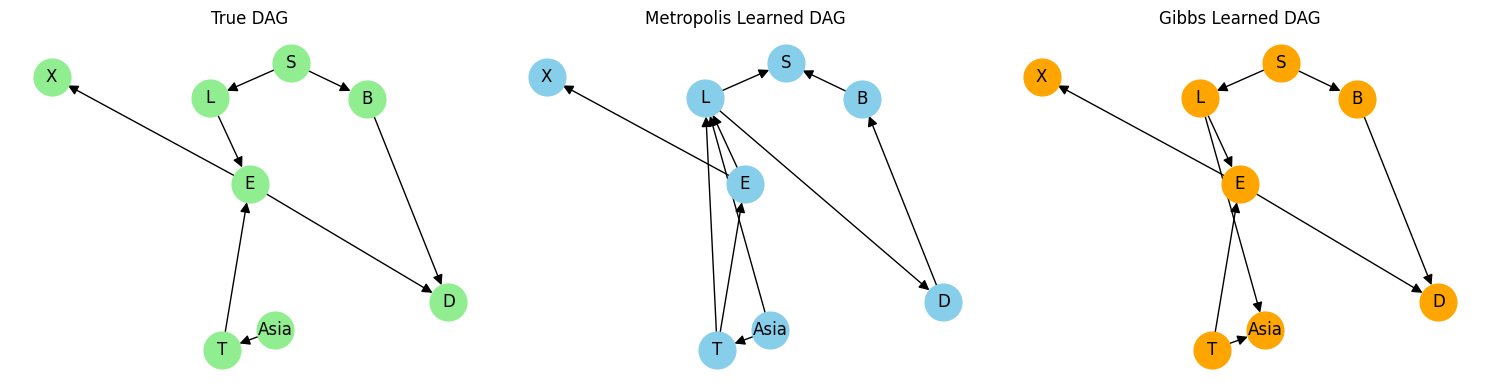

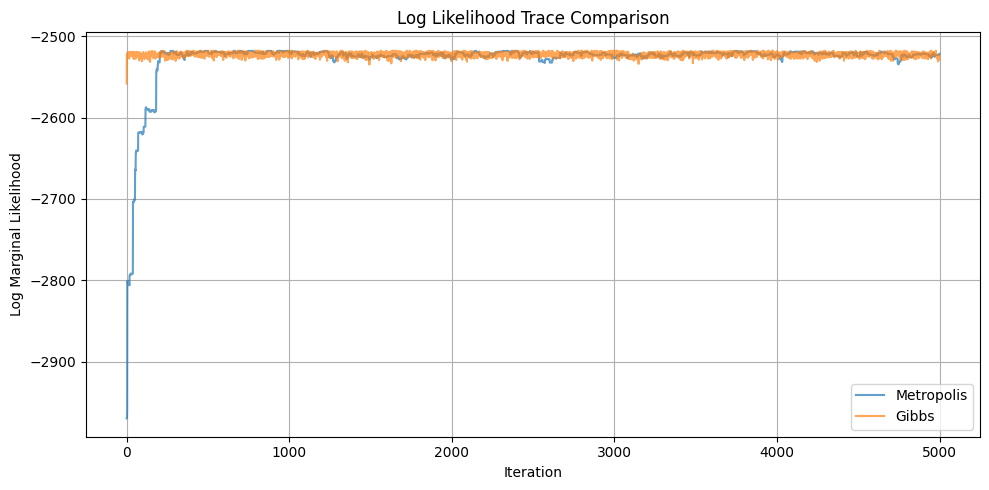

In [ ]:
import numpy as np
import math
import itertools
from typing import Union, List, Any, Optional, Dict,Tuple
import matplotlib.pyplot as plt
import networkx as nx
import itertools

# ----------------------------------------------
# 1. تعریف توابع مورد نیاز
# ----------------------------------------------


def igraph_valid(dag: np.ndarray) -> bool:
    """
    Check if a directed graph is acyclic using Kahn's algorithm.

    Input:
      dag : adjacency matrix (n×n)

    Output:
      ok  : True if dag is acyclic, False otherwise
    """
    n = dag.shape[0]
    # compute in-degrees
    in_deg = np.sum(dag, axis=0).astype(int)
    # queue of nodes with zero in-degree
    zero = [i for i in range(n) if in_deg[i] == 0]
    visited = 0
    idx = 0
    while idx < len(zero):
        u = zero[idx]
        idx += 1
        visited += 1
        # for each child v of u
        for v in range(n):
            if dag[u, v]:
                in_deg[v] -= 1
                if in_deg[v] == 0:
                    zero.append(v)
    return (visited == n)


def family_score(
    node: int,
    parents: List[int],
    cases: np.ndarray,
    ess: float
) -> float:
    """
    Compute the local family score for one node given its parents (BDeu).

    Inputs:
      node    : index of the child variable
      parents : list of parent indices
      cases   : data matrix (observations × variables), discrete values 0..r-1
      ess     : equivalent sample size

    Output:
      sc      : score of this family (log marginal likelihood)
    """
    # cardinality of child
    col = cases[:, node]
    r_i = int(col.max()) + 1

    # cardinalities of parents
    rp = []
    for p in parents:
        rp.append(int(cases[:, p].max()) + 1)
    # number of parent configurations
    q_i = 1
    for r in rp:
        q_i *= r

    # Dirichlet hyperparameters
    alpha_i = ess / q_i
    alpha_ik = ess / (q_i * r_i)

    score = 0.0
    # iterate over all parent configurations
    if parents:
        # generate all possible parent-value tuples
        for config in itertools.product(*(range(r) for r in rp)):
            # select rows matching this parent config
            mask = np.ones(cases.shape[0], dtype=bool)
            for idx_p, p in enumerate(parents):
                mask &= (cases[:, p] == config[idx_p])
            N_j = np.sum(mask)
            # term for N_j
            score += math.lgamma(alpha_i) - math.lgamma(alpha_i + N_j)
            # child states
            for k in range(r_i):
                N_jk = np.sum(mask & (cases[:, node] == k))
                score += math.lgamma(alpha_ik + N_jk) - math.lgamma(alpha_ik)
    else:
        # no parents: single "parent config"
        N_j = cases.shape[0]
        score += math.lgamma(alpha_i) - math.lgamma(alpha_i + N_j)
        for k in range(r_i):
            N_jk = np.sum(cases[:, node] == k)
            score += math.lgamma(alpha_ik + N_jk) - math.lgamma(alpha_ik)

    return score


def log_marg_lik(
    dag: np.ndarray,
    cases: np.ndarray,
    ess: float
) -> float:
    """
    Compute the log marginal likelihood of data under a given DAG using BDeu.

    Inputs:
      dag   : adjacency matrix (n×n)
      cases : data matrix (observations × variables)
      ess   : equivalent sample size

    Output:
      ll    : log marginal likelihood
    """
    n = dag.shape[0]
    ll = 0.0
    for node in range(n):
        parents = list(np.where(dag[:, node] == 1)[0])
        ll += family_score(node, parents, cases, ess)
    return ll


def step_grow(
    dag: np.ndarray
) -> Tuple[np.ndarray, float, float]:
    """
    Propose a 'grow' move by adding one edge.

    Input:
      dag      : current adjacency matrix (n×n)

    Outputs:
      dag_new  : new adjacency matrix after adding an edge
      logq_fwd : log-proposal probability of the forward move
      logq_bwd : log-proposal probability of the reverse move
    """
    n = dag.shape[0]
    # find all edges i->j that are absent and whose addition remains acyclic
    candidates = []
    for i in range(n):
        for j in range(n):
            if i != j and dag[i, j] == 0:
                dag[i, j] = 1
                if igraph_valid(dag):
                    candidates.append((i, j))
                dag[i, j] = 0
    if not candidates:
        # no possible grow, return original
        return dag.copy(), -np.inf, -np.inf

    # choose one uniformly
    i, j = candidates[np.random.randint(len(candidates))]
    dag_new = dag.copy()
    dag_new[i, j] = 1

    # forward/backward proposal log-probabilities
    logq_fwd = -math.log(len(candidates))
    # backward: number of edges that can be pruned in dag_new
    back_cands = np.argwhere(dag_new == 1)
    logq_bwd = -math.log(len(back_cands))

    return dag_new, logq_fwd, logq_bwd


def step_prune(
    dag: np.ndarray
) -> Tuple[np.ndarray, float, float]:
    """
    Propose a 'prune' move by removing one edge.

    Input:
      dag      : current adjacency matrix (n×n)

    Outputs:
      dag_new  : new adjacency matrix after removing an edge
      logq_fwd : log-proposal probability of the forward move
      logq_bwd : log-proposal probability of the reverse move
    """
    # list existing edges
    edges = np.argwhere(dag == 1)
    if edges.size == 0:
        return dag.copy(), -np.inf, -np.inf

    # choose one uniformly to remove
    idx = np.random.randint(edges.shape[0])
    i, j = edges[idx]
    dag_new = dag.copy()
    dag_new[i, j] = 0

    logq_fwd = -math.log(edges.shape[0])
    # backward: possible grows from dag_new
    n = dag.shape[0]
    back_cands = []
    for a in range(n):
        for b in range(n):
            if a != b and dag_new[a, b] == 0:
                dag_new[a, b] = 1
                if igraph_valid(dag_new):
                    back_cands.append((a, b))
                dag_new[a, b] = 0
    logq_bwd = -math.log(len(back_cands)) if back_cands else -np.inf

    return dag_new, logq_fwd, logq_bwd


def step_flip(
    dag: np.ndarray
) -> Tuple[np.ndarray, float, float]:
    """
    Propose a 'flip' move by reversing one edge.

    Input:
      dag      : current adjacency matrix (n×n)

    Outputs:
      dag_new  : new adjacency matrix after reversing an edge
      logq_fwd : log-proposal probability of the forward move
      logq_bwd : log-proposal probability of the reverse move
    """
    n = dag.shape[0]
    candidates = []
    # edges that can be flipped without creating a cycle
    for i in range(n):
        for j in range(n):
            if dag[i, j] == 1 and dag[j, i] == 0:
                # try flip
                dag[i, j] = 0
                dag[j, i] = 1
                if igraph_valid(dag):
                    candidates.append((i, j))
                # revert
                dag[j, i] = 0
                dag[i, j] = 1

    if not candidates:
        return dag.copy(), -np.inf, -np.inf

    # pick uniformly
    i, j = candidates[np.random.randint(len(candidates))]
    dag_new = dag.copy()
    # flip i->j into j->i
    dag_new[i, j] = 0
    dag_new[j, i] = 1

    logq_fwd = -math.log(len(candidates))
    # backward: flippable edges in new dag (i.e., j->i)
    back_cands = []
    for a, b in candidates:
        pass  # ignore old list

    # recompute backwards from dag_new
    for a in range(n):
        for b in range(n):
            if dag_new[a, b] == 1 and dag_new[b, a] == 0:
                dag_new[a, b] = 0
                dag_new[b, a] = 1
                if igraph_valid(dag_new):
                    back_cands.append((a, b))
                dag_new[b, a] = 0
                dag_new[a, b] = 1

    logq_bwd = -math.log(len(back_cands)) if back_cands else -np.inf

    return dag_new, logq_fwd, logq_bwd


def learn_struct_mcmc(
    cases: Union[np.ndarray, List[List[Any]]],
    names: List[str],
    u: Optional[np.ndarray] = None,
    N: int = 10000,
    dag0: Optional[np.ndarray] = None,
    ess: float = 1.0,
    params: Optional[Dict[str, Any]] = None,
    verbose: bool = False
) -> Tuple[np.ndarray, Dict[str, Any]]:
    """
    Learn a Bayesian network structure by MCMC.

    Inputs:
      cases   : 2D array-like, each row is an observation
      names   : list of variable names
      u       : (optional) prior adjacency matrix (n×n) — ignored (uniform)
      N       : number of MCMC iterations
      dag0    : (optional) initial adjacency matrix (n×n)
      ess     : equivalent sample size (for BDeu score)
      params  : dict of MCMC settings:
                   'burnin': int
                   'p_grow', 'p_prune', 'p_flip': floats summing to 1
      verbose : whether to print progress

    Outputs:
      best_dag : adjacency matrix (n×n) of the MAP structure
      stats    : dict with MCMC statistics
    """
    # prepare data
    cases = np.asarray(cases, dtype=int)
    n_vars = cases.shape[1]

    # initial DAG
    if dag0 is None:
        dag = np.zeros((n_vars, n_vars), dtype=int)
    else:
        dag = dag0.copy().astype(int)

    # default params
    if params is None:
        params = {}
    burnin = params.get('burnin', 0)
    p_grow = params.get('p_grow', 1/3)
    p_prune = params.get('p_prune', 1/3)
    p_flip = params.get('p_flip', 1/3)

    # stats
    loglik_trace = []
    accept_count = {'grow': 0, 'prune': 0, 'flip': 0}
    move_count = {'grow': 0, 'prune': 0, 'flip': 0}

    # initial score
    current_ll = log_marg_lik(dag, cases, ess)
    best_ll = current_ll
    best_dag = dag.copy()

    for t in range(1, N+1):
        # choose move
        u_move = np.random.rand()
        if u_move < p_grow:
            move = 'grow'
            dag_prop, logq_fwd, logq_bwd = step_grow(dag)
        elif u_move < p_grow + p_prune:
            move = 'prune'
            dag_prop, logq_fwd, logq_bwd = step_prune(dag)
        else:
            move = 'flip'
            dag_prop, logq_fwd, logq_bwd = step_flip(dag)

        move_count[move] += 1

        # if proposal is invalid
        if logq_fwd == -np.inf or not igraph_valid(dag_prop):
            loglik_trace.append(current_ll)
            continue

        # compute new score
        new_ll = log_marg_lik(dag_prop, cases, ess)
        # MH ratio (uniform prior over DAGs)
        log_accept_ratio = (new_ll - current_ll) + (logq_bwd - logq_fwd)
        if math.log(np.random.rand()) < log_accept_ratio:
            # accept
            dag = dag_prop
            current_ll = new_ll
            accept_count[move] += 1
            if current_ll > best_ll and t > burnin:
                best_ll = current_ll
                best_dag = dag.copy()

        loglik_trace.append(current_ll)
        if verbose and t % (N // 10 or 1) == 0:
            print(f"Iter {t}/{N}, current_ll={current_ll:.2f}, best_ll={best_ll:.2f}")

    # summarize stats
    stats = {
        'loglik_trace': loglik_trace,
        'accept_rate': {m: accept_count[m] / max(1, move_count[m]) for m in move_count},
        'best_score': best_ll,
        'move_counts': move_count
    }
    return best_dag, stats

def gibbs_struct_learning(cases: np.ndarray, ess: float = 1.0, steps: int = 10000,
                          dag_init: Optional[np.ndarray] = None, verbose: bool = True) -> Tuple[np.ndarray, List[float]]:
    n = cases.shape[1]
    dag = np.zeros((n, n), dtype=int) if dag_init is None else dag_init.copy()
    current_ll = log_marg_lik(dag, cases, ess)
    best_ll = current_ll
    best_dag = dag.copy()
    trace = [current_ll]
    for step in range(steps):
        i, j = np.random.choice(n, 2, replace=False)
        if i == j:
            continue
        dag_prop = dag.copy()
        dag_prop[i, j] = 1 - dag[i, j]
        if not igraph_valid(dag_prop):
            trace.append(current_ll)
            continue
        new_ll = log_marg_lik(dag_prop, cases, ess)
        if np.log(np.random.rand()) < (new_ll - current_ll):
            dag = dag_prop
            current_ll = new_ll
            if new_ll > best_ll:
                best_ll = new_ll
                best_dag = dag.copy()
        trace.append(current_ll)
        if verbose and step % (steps // 10 or 1) == 0:
            print(f"Step {step}/{steps} - Current LL: {current_ll:.2f}, Best: {best_ll:.2f}")
    return best_dag, trace


def gibbs_struct_learning_flex(
    cases: np.ndarray,
    ess: float = 1.0,
    steps: int = 10000,
    dag_init: Optional[np.ndarray] = None,
    p_ops: Tuple[float, float, float] = (0.3, 0.3, 0.4),
    verbose: bool = True
) -> Tuple[np.ndarray, List[float]]:

    n = cases.shape[1]
    dag = np.zeros((n, n), dtype=int) if dag_init is None else dag_init.copy()
    current_ll = log_marg_lik(dag, cases, ess)
    best_ll = current_ll
    best_dag = dag.copy()
    trace = [current_ll]

    for step in range(steps):
        i, j = np.random.choice(n, 2, replace=False)
        if i == j:
            continue

        move = np.random.choice(['grow', 'prune', 'flip'], p=p_ops)
        dag_prop = dag.copy()

        if move == 'grow' and dag[i, j] == 0:
            dag_prop[i, j] = 1
        elif move == 'prune' and dag[i, j] == 1:
            dag_prop[i, j] = 0
        elif move == 'flip':
            dag_prop[i, j], dag_prop[j, i] = dag[j, i], dag[i, j]
        else:
            trace.append(current_ll)
            continue

        if not igraph_valid(dag_prop):
            trace.append(current_ll)
            continue

        new_ll = log_marg_lik(dag_prop, cases, ess)
        if np.log(np.random.rand()) < (new_ll - current_ll):
            dag = dag_prop
            current_ll = new_ll
            if new_ll > best_ll:
                best_ll = new_ll
                best_dag = dag.copy()

        trace.append(current_ll)
        if verbose and step % (steps // 10 or 1) == 0:
            print(f"Step {step}/{steps} - LL: {current_ll:.2f}, Best: {best_ll:.2f}")

    return best_dag, trace

# ----------------------------------------------
# 2. تعریف شبکه Asia و CPDs و Ancestral Sampling
# ----------------------------------------------
def mk_asia():
    names = ['Asia','T','S','L','B','E','X','D']
    n = len(names)
    dag = np.zeros((n,n), dtype=int)
    dag[0,1] = 1   # Asia->T
    dag[2,3] = 1   # S->L
    dag[2,4] = 1   # S->B
    dag[1,5] = 1   # T->E
    dag[3,5] = 1   # L->E
    dag[5,6] = 1   # E->X
    dag[5,7] = 1   # E->D
    dag[4,7] = 1   # B->D
    cpd = {
        0: {(): 0.01},
        2: {(): 0.50},
        1: {(0,): 0.01, (1,): 0.05},
        3: {(0,): 0.10, (1,): 0.01},
        4: {(0,): 0.60, (1,): 0.30},
        5: {(0,0): 0.00, (0,1): 1.00, (1,0): 1.00, (1,1): 1.00},
        6: {(0,): 0.05, (1,): 0.98},
        7: {(0,0): 0.30, (0,1): 0.60, (1,0): 0.70, (1,1): 0.90}
    }
    return names, dag, cpd



def sample_bnet(dag: np.ndarray, cpd: dict, N: int) -> np.ndarray:
    n = dag.shape[0]
    in_deg = np.sum(dag, axis=0).astype(int)
    zero = [i for i in range(n) if in_deg[i] == 0]
    topo = []
    while zero:
        u = zero.pop()
        topo.append(u)
        for v in range(n):
            if dag[u,v]:
                in_deg[v] -= 1
                if in_deg[v]==0:
                    zero.append(v)
    data = np.zeros((N,n), dtype=int)
    for i,node in enumerate(topo):
        parents = list(np.where(dag[:,node]==1)[0])
        for t in range(N):
            if not parents:
                p1 = cpd[node][()]
            else:
                par_state = tuple(data[t,p] for p in parents)
                p1 = cpd[node][par_state]
            data[t,node] = np.random.rand() < p1
    return data


import numpy as np

def gibbs_struct_learning_unified(
    data,
    nodes,
    score_func,    # مثلاً: family_score(state, data, i, ess)
    is_dag_func,   # مثلاً: igraph_valid(adj_matrix)
    steps=10000,
    start_dag=None,
    random_state=None,
    ess=1.0, # اضافه کردن ess به ورودی
):
    """
    Gibbs Sampler for Bayesian Network Structure Learning (Zareifard et al. 2021 style).
    فقط برای DAGهای دوداری (واجد بودن یا نبودن یال).
    - data: داده های جدولی
    - nodes: تعداد متغیرها (n)
    - score_func: تابع امتیاز خانواده که ورودی: وضعیت DAG و داده، خروجی: لیست یا دیکشنری امتیاز همه خانواده ها
    - is_dag_func: تابع بررسی DAG بودن (mat->bool)
    - steps: تعداد گامها
    - start_dag: ماتریس adjacency اولیه (اختیاری)
    - ess: equivalent sample size برای محاسبه BDeu Score
    """
    rng = np.random.default_rng(random_state)
    n = nodes
    # حالت اولیه DAG
    if start_dag is None:
        adj = np.zeros((n, n), dtype=int)
    else:
        adj = start_dag.copy()
    samples = []
    scores_trace = []
    for step in range(steps):
        for i in range(n):
            for j in range(n):
                if i == j:
                    continue
                # هر بار وجود/عدم وجود یال i→j را نمونه‌برداری می‌کنیم:
                # حالت فعلی: adj[i, j]
                # حالت 1: وجود یال
                adj[i, j] = 1
                if is_dag_func(adj):
                    # اطمینان حاصل کنید که family_score با ess صدا زده می‌شود
                    score1 = score_func(j, list(np.where(adj[:, j] == 1)[0]), data, ess)
                else:
                    score1 = -np.inf
                # حالت 0: عدم وجود یال
                adj[i, j] = 0
                if is_dag_func(adj):
                     # اطمینان حاصل کنید که family_score با ess صدا زده می‌شود
                    score0 = score_func(j, list(np.where(adj[:, j] == 1)[0]), data, ess)
                else:
                    score0 = -np.inf
                # احتمال وجود یا عدم وجود یال (تاپ=exp(score))
                scores = np.array([score0, score1])
                # Avoid overflow in exp
                max_score = np.max(scores)
                if max_score == -np.inf: # Both scores are -inf
                     p = np.array([0.5, 0.5]) # Assign equal probability if both invalid
                else:
                    p = np.exp(scores - max_score)  # پایدارسازی عددی
                    p /= p.sum()

                # نمونه برداری مقدار جدید
                adj[i, j] = rng.choice([0, 1], p=p)

        samples.append(adj.copy())
        # جمع کل امتیازات را محاسبه کنید
        total_score_step = 0
        for k in range(n):
            parents_k = list(np.where(adj[:, k] == 1)[0])
            # اطمینان حاصل کنید که family_score با ess صدا زده می‌شود
            total_score_step += family_score(k, parents_k, data, ess)
        scores_trace.append(total_score_step)

    return samples, scores_trace


# ----------------------------------------------
# 3. رسم گراف‌ها
# ----------------------------------------------
def compare_all_dags(true_adj, dag_mcmc, dag_gibbs, names):
    def build_graph(adj):
        G = nx.DiGraph()
        for i in range(adj.shape[0]):
            for j in range(adj.shape[1]):
                if adj[i, j]:
                    G.add_edge(i, j)
        return G
    G_true = build_graph(true_adj)
    G_mcmc = build_graph(dag_mcmc)
    G_gibbs = build_graph(dag_gibbs)
    pos = nx.spring_layout(G_true, seed=42)
    plt.figure(figsize=(15, 4))
    for idx, (G, title, color) in enumerate(zip([G_true, G_mcmc, G_gibbs],
                                                ["True DAG", "Metropolis Learned DAG", "Gibbs Learned DAG"],
                                                ['lightgreen', 'skyblue', 'orange'])):
        plt.subplot(1, 3, idx+1)
        nx.draw(G, pos, with_labels=True, labels={i: n for i, n in enumerate(names)},
                node_size=700, node_color=color, arrowsize=15)
        plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_ll_traces(trace_mcmc, trace_gibbs):
    plt.figure(figsize=(10, 5))
    plt.plot(trace_mcmc, label="Metropolis", alpha=0.7)
    plt.plot(trace_gibbs, label="Gibbs", alpha=0.7)
    plt.xlabel("Iteration")
    plt.ylabel("Log Marginal Likelihood")
    plt.title("Log Likelihood Trace Comparison")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------------------------------------------
# 4. اجرای کامل
# ----------------------------------------------
if __name__ == '__main__':
    np.random.seed(0)
    names, true_dag, cpd = mk_asia()
    cases = sample_bnet(true_dag, cpd, 1000)
    n_nodes = 8

    # Metropolis
    best_dag_mcmc, stats_mcmc = learn_struct_mcmc(
        cases=cases,
        names=names,
        u=np.zeros_like(true_dag),
        N=5000,
        dag0=np.zeros_like(true_dag),
        ess=1.0,
        params={"burnin": 1000, "p_grow": 0.3, "p_prune": 0.3, "p_flip": 0.4},
        verbose=False
    )
    # Gibbs
    samples, scores_trace = gibbs_struct_learning_unified(
        data=cases, # Use 'cases' which holds the data
        nodes=n_nodes,
        score_func=family_score,
        is_dag_func=igraph_valid,
        steps=5000, # Reduced steps for faster execution
        start_dag=None,
        random_state=42,
        ess=1.0,  # Pass ess to the function
    )
    # To use best_dag_gibbs in plotting, you need to determine it from samples and scores_trace
    # One common way is to find the DAG with the highest score after burn-in
    burn_in_gibbs = 1000 # Assuming similar burn-in as MCMC
    if len(samples) > burn_in_gibbs:
        post_burnin_scores = scores_trace[burn_in_gibbs:]
        best_score_index = np.argmax(post_burnin_scores) + burn_in_gibbs
        best_dag_gibbs = samples[best_score_index]
        trace_gibbs = scores_trace # Use scores_trace for plotting
    else:
         best_dag_gibbs = samples[-1] if samples else np.zeros_like(true_dag)
         trace_gibbs = scores_trace


    # مقایسه
    compare_all_dags(true_dag, best_dag_mcmc, best_dag_gibbs, names)
    plot_ll_traces(stats_mcmc['loglik_trace'], trace_gibbs)

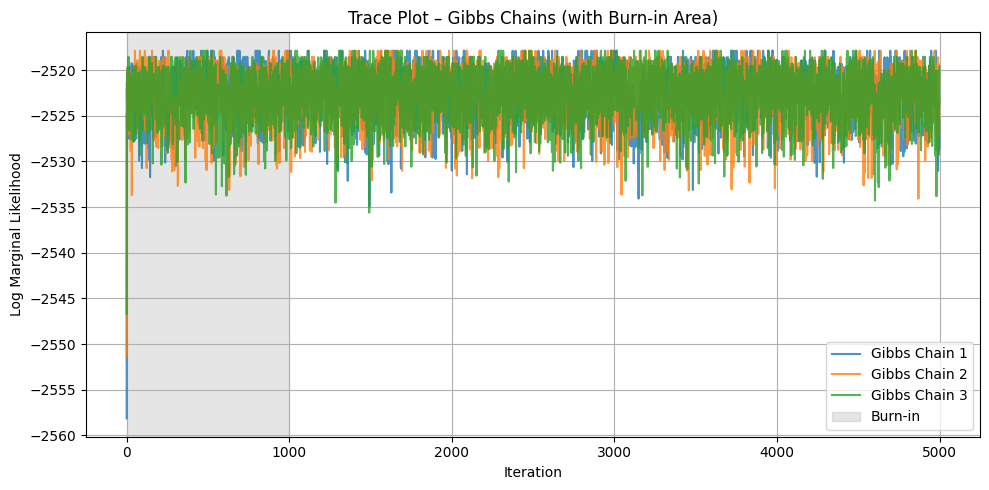

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

burnin = 1000

# اجرای چند زنجیره با شروع متفاوت
num_chains = 3
chain_traces = []
for rr in [42, 17, 7]:
    _, scores_trace = gibbs_struct_learning_unified(
        data=cases,
        nodes=n_nodes,
        score_func=family_score,
        is_dag_func=igraph_valid,
        steps=5000,
        start_dag=None,
        random_state=rr,
        ess=1.0,
    )
    chain_traces.append(scores_trace)

plt.figure(figsize=(10, 5))
for idx, trace in enumerate(chain_traces):
    plt.plot(trace, label=f"Gibbs Chain {idx+1}", alpha=0.8)
plt.axvspan(0, burnin, color='gray', alpha=0.2, label='Burn-in')  # سایه Burn-in
plt.xlabel("Iteration")
plt.ylabel("Log Marginal Likelihood")
plt.title("Trace Plot – Gibbs Chains (with Burn-in Area)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# فرض: names, true_dag, best_dag_gibbs را داری
# names = ['Asia','T','S','L','B','E','X','D']

def print_diff_edges(true_adj, learned_adj, node_names):
    n = true_adj.shape[0]
    diffs = []
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
            if true_adj[i, j] != learned_adj[i, j]:
                if true_adj[i, j] == 1 and learned_adj[i, j] == 0:
                    diffs.append(f"حذف یال: {node_names[i]} → {node_names[j]}")
                elif true_adj[i, j] == 0 and learned_adj[i, j] == 1:
                    diffs.append(f"اضافه/جهت معکوس یال: {node_names[i]} → {node_names[j]}")
    print("\n--- لیست دقیق یال‌های متفاوت ---")
    for d in diffs:
        print(d)
    print(f"کل اختلافات: {len(diffs)} (SHD)")

# اجرا:
print_diff_edges(true_dag, best_dag_gibbs, names)



--- لیست دقیق یال‌های متفاوت ---
حذف یال: Asia → T
اضافه/جهت معکوس یال: T → Asia
اضافه/جهت معکوس یال: L → Asia
کل اختلافات: 3 (SHD)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# -- تعریف توابع کمکی (در صورت نیاز قرار بده) --
def shd(adj1: np.ndarray, adj2: np.ndarray) -> int:
    """Structural Hamming Distance = تعداد یال‌های متفاوت (جهت‌دار)."""
    return np.sum(adj1 != adj2)

def dag_to_vector(adj: np.ndarray) -> np.ndarray:
    """Adjacency رو به وکتور یال 0/1 (بدون قطر اصلی) تبدیل می‌کند."""
    n = adj.shape[0]
    return adj[~np.eye(n, dtype=bool)].flatten()

# -- فرض بر این است که موارد زیر مقداردهی شدند: --
# true_dag        : adjacency matrix شبکه ground truth
# best_dag_mcmc   : بهترین adjacency کشف‌شده توسط MH
# best_dag_gibbs  : بهترین adjacency کشف‌شده توسط Gibbs
# stats_mcmc['loglik_trace'] : لیست loglikelihood برای MH
# trace_gibbs              : لیست loglikelihood برای Gibbs

# ----- مقایسه کمی و گزارشی -----
ll_mcmc = max(stats_mcmc['loglik_trace'])
ll_gibbs = max(trace_gibbs)

shd_mcmc = shd(true_dag, best_dag_mcmc)
shd_gibbs = shd(true_dag, best_dag_gibbs)

print('\n==============================')
print('⚖️   **مقایسه کمی عملکرد متروپلیس و گیبز**   ')
print("==============================")
print(f"Log-Likelihood نهایی (متروپلیس): {ll_mcmc:.2f}")
print(f"Log-Likelihood نهایی (گیبز):      {ll_gibbs:.2f}")
print(f"Structural Hamming Distance (SHD):")
print(f"  متروپلیس: {shd_mcmc}")
print(f"  گیبز:      {shd_gibbs}")

if ll_mcmc > ll_gibbs:
    print('🔵 متروپلیس بالاترین Log-Likelihood را دارد.')
elif ll_gibbs > ll_mcmc:
    print('🟠 گیبز بالاترین Log-Likelihood را دارد.')
else:
    print('✅ هر دو الگوریتم Log-Likelihood برابر داشتند.')

if shd_mcmc < shd_gibbs:
    print('🔵 متروپلیس ساختار نزدیک‌تری به گراف واقعی استخراج کرد (SHD کمتر).')
elif shd_gibbs < shd_mcmc:
    print('🟠 گیبز ساختار نزدیک‌تری به گراف واقعی استخراج کرد (SHD کمتر).')
else:
    print('✅ هر دو الگوریتم SHD مساوی با گراف واقعی داشتند.')
print("==============================\n")

# ----- محاسبه معیارهای دقت، یادآوری، F1، confusion matrix -----
y_true   = dag_to_vector(true_dag)
y_mcmc   = dag_to_vector(best_dag_mcmc)
y_gibbs  = dag_to_vector(best_dag_gibbs)

prec_mcmc = precision_score(y_true, y_mcmc, zero_division=0)
rec_mcmc  = recall_score(y_true, y_mcmc, zero_division=0)
f1_mcmc   = f1_score(y_true, y_mcmc, zero_division=0)
cm_mcmc   = confusion_matrix(y_true, y_mcmc)

prec_gibbs = precision_score(y_true, y_gibbs, zero_division=0)
rec_gibbs  = recall_score(y_true, y_gibbs, zero_division=0)
f1_gibbs   = f1_score(y_true, y_gibbs, zero_division=0)
cm_gibbs   = confusion_matrix(y_true, y_gibbs)

print("\n------ مقایسه معیارهای پیشرفته (یال‌ها) ------")
print(f"متروپلیس:\n  Precision={prec_mcmc:.2f}  Recall={rec_mcmc:.2f}  F1={f1_mcmc:.2f}")
print(f"Confusion Matrix (rows: true, cols: pred):\n{cm_mcmc}\n")
print(f"گیبز:\n  Precision={prec_gibbs:.2f}  Recall={rec_gibbs:.2f}  F1={f1_gibbs:.2f}")
print(f"Confusion Matrix (rows: true, cols: pred):\n{cm_gibbs}\n")

# نتیجه‌گیری مقایسه F1
if f1_mcmc > f1_gibbs:
    winner_msg = "🔵 متروپلیس از نظر F1-score عملکرد بهتری داشت."
elif f1_gibbs > f1_mcmc:
    winner_msg = "🟠 گیبز از نظر F1-score عملکرد بهتری داشت."
else:
    winner_msg = "✅ هر دو الگوریتم F1-score برابر داشتند."
print(winner_msg)



⚖️   **مقایسه کمی عملکرد متروپلیس و گیبز**   
Log-Likelihood نهایی (متروپلیس): -2518.13
Log-Likelihood نهایی (گیبز):      -2517.86
Structural Hamming Distance (SHD):
  متروپلیس: 12
  گیبز:      3
🟠 گیبز بالاترین Log-Likelihood را دارد.
🟠 گیبز ساختار نزدیک‌تری به گراف واقعی استخراج کرد (SHD کمتر).


------ مقایسه معیارهای پیشرفته (یال‌ها) ------
متروپلیس:
  Precision=0.30  Recall=0.38  F1=0.33
Confusion Matrix (rows: true, cols: pred):
[[41  7]
 [ 5  3]]

گیبز:
  Precision=0.78  Recall=0.88  F1=0.82
Confusion Matrix (rows: true, cols: pred):
[[46  2]
 [ 1  7]]

🟠 گیبز از نظر F1-score عملکرد بهتری داشت.


# with limit parent

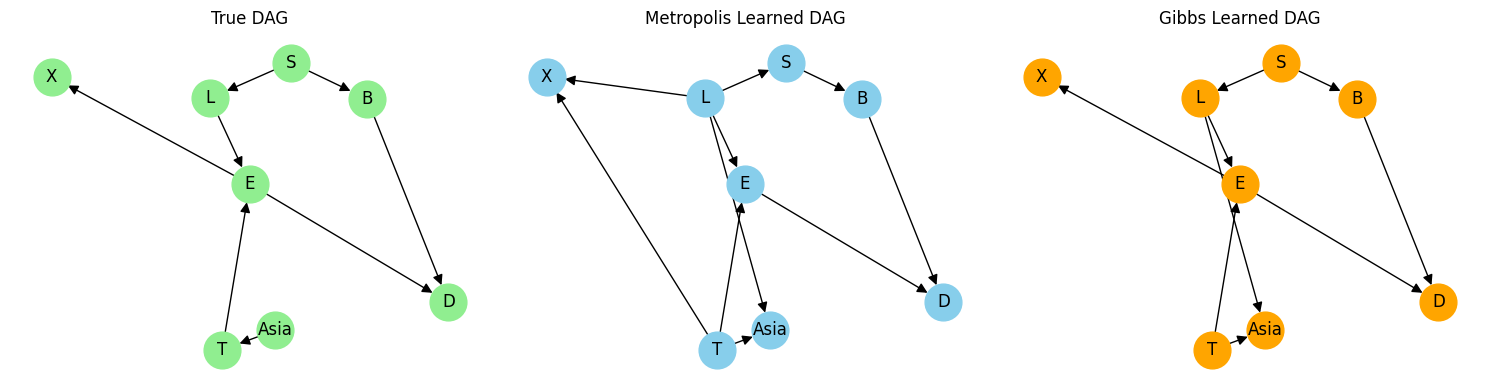

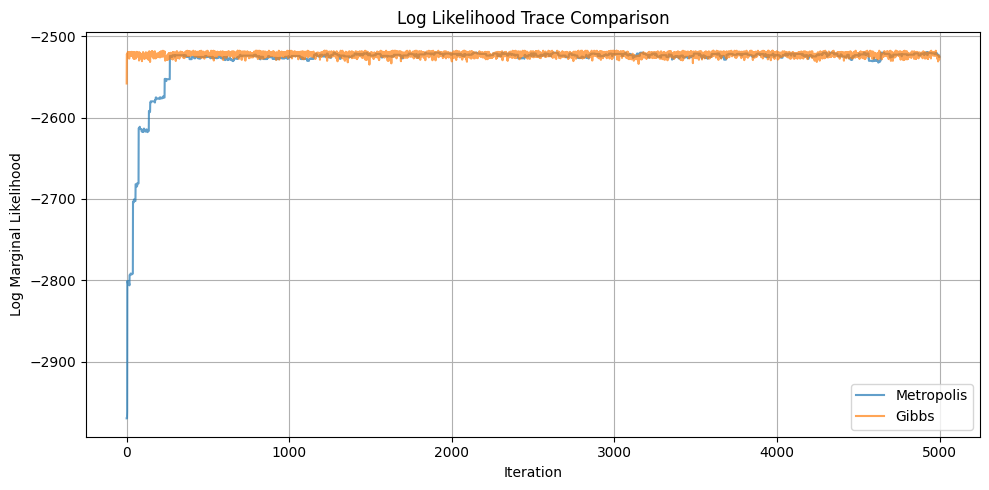

In [ ]:
import numpy as np
import math
from typing import Optional, List, Tuple
import numpy as np
import math
import itertools
from typing import Union, List, Any, Optional, Dict,Tuple
import matplotlib.pyplot as plt
import networkx as nx
import itertools


MAX_PARENTS = 2  # هر عدد دلخواه

def igraph_valid(dag: np.ndarray) -> bool:
    n = dag.shape[0]
    in_deg = np.sum(dag, axis=0)
    zero = [i for i in range(n) if in_deg[i] == 0]
    visited = 0
    idx = 0
    while idx < len(zero):
        u = zero[idx]
        idx += 1
        visited += 1
        for v in range(n):
            if dag[u, v]:
                in_deg[v] -= 1
                if in_deg[v] == 0:
                    zero.append(v)
    return (visited == n)

def parent_ok(dag: np.ndarray, j: int, max_parents: int = MAX_PARENTS) -> bool:
    return np.sum(dag[:, j]) <= max_parents

def family_score(node: int, parents: List[int], cases: np.ndarray, ess: float) -> float:
    col = cases[:, node]
    r_i = int(col.max()) + 1
    rp = [int(cases[:, p].max()) + 1 for p in parents]
    q_i = np.prod(rp) if rp else 1
    alpha_i = ess / q_i
    alpha_ik = ess / (q_i * r_i)
    score = 0.0
    if parents:
        for config in np.ndindex(*rp):
            mask = np.ones(len(col), dtype=bool)
            for idx_p, p in enumerate(parents):
                mask &= (cases[:, p] == config[idx_p])
            N_j = np.sum(mask)
            score += math.lgamma(alpha_i) - math.lgamma(alpha_i + N_j)
            for k in range(r_i):
                N_jk = np.sum(mask & (col == k))
                score += math.lgamma(alpha_ik + N_jk) - math.lgamma(alpha_ik)
    else:
        N_j = cases.shape[0]
        score += math.lgamma(alpha_i) - math.lgamma(alpha_i + N_j)
        for k in range(r_i):
            N_jk = np.sum(col == k)
            score += math.lgamma(alpha_ik + N_jk) - math.lgamma(alpha_ik)
    return score

def log_marg_lik(dag: np.ndarray, cases: np.ndarray, ess: float) -> float:
    n = dag.shape[0]
    return sum(family_score(node, list(np.where(dag[:, node] == 1)[0]), cases, ess) for node in range(n))

def step_grow(dag: np.ndarray) -> Tuple[np.ndarray, float, float]:
    n = dag.shape[0]
    candidates = []
    for i in range(n):
        for j in range(n):
            if i != j and dag[i, j] == 0:
                dag[i, j] = 1
                if igraph_valid(dag) and parent_ok(dag, j):
                    candidates.append((i, j))
                dag[i, j] = 0
    if not candidates:
        return dag.copy(), -np.inf, -np.inf
    i, j = candidates[np.random.randint(len(candidates))]
    dag_new = dag.copy()
    dag_new[i, j] = 1
    logq_fwd = -math.log(len(candidates))
    back_cands = np.argwhere(dag_new == 1)
    logq_bwd = -math.log(len(back_cands))
    return dag_new, logq_fwd, logq_bwd

def step_prune(dag: np.ndarray) -> Tuple[np.ndarray, float, float]:
    edges = np.argwhere(dag == 1)
    if edges.size == 0:
        return dag.copy(), -np.inf, -np.inf
    idx = np.random.randint(edges.shape[0])
    i, j = edges[idx]
    dag_new = dag.copy()
    dag_new[i, j] = 0
    logq_fwd = -math.log(edges.shape[0])
    n = dag.shape[0]
    back_cands = []
    for a in range(n):
        for b in range(n):
            if a != b and dag_new[a, b] == 0:
                dag_new[a, b] = 1
                if igraph_valid(dag_new) and parent_ok(dag_new, b):
                    back_cands.append((a, b))
                dag_new[a, b] = 0
    logq_bwd = -math.log(len(back_cands)) if back_cands else -np.inf
    return dag_new, logq_fwd, logq_bwd

def step_flip(dag: np.ndarray) -> Tuple[np.ndarray, float, float]:
    n = dag.shape[0]
    candidates = []
    for i in range(n):
        for j in range(n):
            if dag[i, j] == 1 and dag[j, i] == 0:
                dag[i, j] = 0
                dag[j, i] = 1
                if igraph_valid(dag) and parent_ok(dag, i) and parent_ok(dag, j):
                    candidates.append((i, j))
                dag[j, i] = 0
                dag[i, j] = 1
    if not candidates:
        return dag.copy(), -np.inf, -np.inf
    i, j = candidates[np.random.randint(len(candidates))]
    dag_new = dag.copy()
    dag_new[i, j] = 0
    dag_new[j, i] = 1
    logq_fwd = -math.log(len(candidates))
    back_cands = []
    for a in range(n):
        for b in range(n):
            if dag_new[a, b] == 1 and dag_new[b, a] == 0:
                dag_new[a, b] = 0
                dag_new[b, a] = 1
                if igraph_valid(dag_new) and parent_ok(dag_new, a) and parent_ok(dag_new, b):
                    back_cands.append((a, b))
                dag_new[b, a] = 0
                dag_new[a, b] = 1
    logq_bwd = -math.log(len(back_cands)) if back_cands else -np.inf
    return dag_new, logq_fwd, logq_bwd

def learn_struct_mcmc(
    cases: np.ndarray,
    N: int = 5000,
    dag0: Optional[np.ndarray] = None,
    ess: float = 1.0,
    burnin: int = 0,
    verbose: bool = False,
    max_parents: int = MAX_PARENTS
) -> Tuple[np.ndarray, dict]:
    cases = np.asarray(cases, dtype=int)
    n_vars = cases.shape[1]
    dag = np.zeros((n_vars, n_vars), dtype=int) if dag0 is None else dag0.copy()
    current_ll = log_marg_lik(dag, cases, ess)
    best_ll = current_ll
    best_dag = dag.copy()
    loglik_trace = []
    accept_count = {'grow': 0, 'prune': 0, 'flip': 0}
    move_count = {'grow': 0, 'prune': 0, 'flip': 0}
    for t in range(1, N + 1):
        u_move = np.random.rand()
        if u_move < 1 / 3:
            move = 'grow'
            dag_prop, logq_fwd, logq_bwd = step_grow(dag)
        elif u_move < 2 / 3:
            move = 'prune'
            dag_prop, logq_fwd, logq_bwd = step_prune(dag)
        else:
            move = 'flip'
            dag_prop, logq_fwd, logq_bwd = step_flip(dag)
        move_count[move] += 1
        if logq_fwd == -np.inf or not igraph_valid(dag_prop):
            loglik_trace.append(current_ll)
            continue
        new_ll = log_marg_lik(dag_prop, cases, ess)
        log_accept_ratio = (new_ll - current_ll) + (logq_bwd - logq_fwd)
        if math.log(np.random.rand()) < log_accept_ratio:
            dag = dag_prop
            current_ll = new_ll
            accept_count[move] += 1
            if current_ll > best_ll and t > burnin:
                best_ll = current_ll
                best_dag = dag.copy()
        loglik_trace.append(current_ll)
        if verbose and t % (N // 10 or 1) == 0:
            print(f"Iter {t}/{N}, current_ll={current_ll:.2f}, best_ll={best_ll:.2f}")
    stats = {
        'loglik_trace': loglik_trace,
        'accept_rate': {m: accept_count[m] / max(1, move_count[m]) for m in move_count},
        'best_score': best_ll,
        'move_counts': move_count
    }
    return best_dag, stats

def gibbs_struct_learning_unified(
    data,
    nodes,
    score_func,    # مثلاً: family_score(state, data, i, ess)
    is_dag_func,   # مثلاً: igraph_valid(adj_matrix)
    steps=10000,
    start_dag=None,
    random_state=None,
    ess=1.0, # اضافه کردن ess به ورودی
):
    """
    Gibbs Sampler for Bayesian Network Structure Learning (Zareifard et al. 2021 style).
    فقط برای DAGهای دوداری (واجد بودن یا نبودن یال).
    - data: داده های جدولی
    - nodes: تعداد متغیرها (n)
    - score_func: تابع امتیاز خانواده که ورودی: وضعیت DAG و داده، خروجی: لیست یا دیکشنری امتیاز همه خانواده ها
    - is_dag_func: تابع بررسی DAG بودن (mat->bool)
    - steps: تعداد گامها
    - start_dag: ماتریس adjacency اولیه (اختیاری)
    - ess: equivalent sample size برای محاسبه BDeu Score
    """
    rng = np.random.default_rng(random_state)
    n = nodes
    # حالت اولیه DAG
    if start_dag is None:
        adj = np.zeros((n, n), dtype=int)
    else:
        adj = start_dag.copy()
    samples = []
    scores_trace = []
    for step in range(steps):
        for i in range(n):
            for j in range(n):
                if i == j:
                    continue
                # هر بار وجود/عدم وجود یال i→j را نمونه‌برداری می‌کنیم:
                # حالت فعلی: adj[i, j]
                # حالت 1: وجود یال
                adj[i, j] = 1
                if is_dag_func(adj):
                    # اطمینان حاصل کنید که family_score با ess صدا زده می‌شود
                    score1 = score_func(j, list(np.where(adj[:, j] == 1)[0]), data, ess)
                else:
                    score1 = -np.inf
                # حالت 0: عدم وجود یال
                adj[i, j] = 0
                if is_dag_func(adj):
                     # اطمینان حاصل کنید که family_score با ess صدا زده می‌شود
                    score0 = score_func(j, list(np.where(adj[:, j] == 1)[0]), data, ess)
                else:
                    score0 = -np.inf
                # احتمال وجود یا عدم وجود یال (تاپ=exp(score))
                scores = np.array([score0, score1])
                # Avoid overflow in exp
                max_score = np.max(scores)
                if max_score == -np.inf: # Both scores are -inf
                     p = np.array([0.5, 0.5]) # Assign equal probability if both invalid
                else:
                    p = np.exp(scores - max_score)  # پایدارسازی عددی
                    p /= p.sum()

                # نمونه برداری مقدار جدید
                adj[i, j] = rng.choice([0, 1], p=p)

        samples.append(adj.copy())
        # جمع کل امتیازات را محاسبه کنید
        total_score_step = 0
        for k in range(n):
            parents_k = list(np.where(adj[:, k] == 1)[0])
            # اطمینان حاصل کنید که family_score با ess صدا زده می‌شود
            total_score_step += family_score(k, parents_k, data, ess)
        scores_trace.append(total_score_step)

    return samples, scores_trace


# ----------------------------------------------
# 3. رسم گراف‌ها
# ----------------------------------------------
def compare_all_dags(true_adj, dag_mcmc, dag_gibbs, names):
    def build_graph(adj):
        G = nx.DiGraph()
        for i in range(adj.shape[0]):
            for j in range(adj.shape[1]):
                if adj[i, j]:
                    G.add_edge(i, j)
        return G
    G_true = build_graph(true_adj)
    G_mcmc = build_graph(dag_mcmc)
    G_gibbs = build_graph(dag_gibbs)
    pos = nx.spring_layout(G_true, seed=42)
    plt.figure(figsize=(15, 4))
    for idx, (G, title, color) in enumerate(zip([G_true, G_mcmc, G_gibbs],
                                                ["True DAG", "Metropolis Learned DAG", "Gibbs Learned DAG"],
                                                ['lightgreen', 'skyblue', 'orange'])):
        plt.subplot(1, 3, idx+1)
        nx.draw(G, pos, with_labels=True, labels={i: n for i, n in enumerate(names)},
                node_size=700, node_color=color, arrowsize=15)
        plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_ll_traces(trace_mcmc, trace_gibbs):
    plt.figure(figsize=(10, 5))
    plt.plot(trace_mcmc, label="Metropolis", alpha=0.7)
    plt.plot(trace_gibbs, label="Gibbs", alpha=0.7)
    plt.xlabel("Iteration")
    plt.ylabel("Log Marginal Likelihood")
    plt.title("Log Likelihood Trace Comparison")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------------------------------------------
# 2. تعریف شبکه Asia و CPDs و Ancestral Sampling
# ----------------------------------------------
def mk_asia():
    names = ['Asia','T','S','L','B','E','X','D']
    n = len(names)
    dag = np.zeros((n,n), dtype=int)
    dag[0,1] = 1   # Asia->T
    dag[2,3] = 1   # S->L
    dag[2,4] = 1   # S->B
    dag[1,5] = 1   # T->E
    dag[3,5] = 1   # L->E
    dag[5,6] = 1   # E->X
    dag[5,7] = 1   # E->D
    dag[4,7] = 1   # B->D
    cpd = {
        0: {(): 0.01},
        2: {(): 0.50},
        1: {(0,): 0.01, (1,): 0.05},
        3: {(0,): 0.10, (1,): 0.01},
        4: {(0,): 0.60, (1,): 0.30},
        5: {(0,0): 0.00, (0,1): 1.00, (1,0): 1.00, (1,1): 1.00},
        6: {(0,): 0.05, (1,): 0.98},
        7: {(0,0): 0.30, (0,1): 0.60, (1,0): 0.70, (1,1): 0.90}
    }
    return names, dag, cpd



def sample_bnet(dag: np.ndarray, cpd: dict, N: int) -> np.ndarray:
    n = dag.shape[0]
    in_deg = np.sum(dag, axis=0).astype(int)
    zero = [i for i in range(n) if in_deg[i] == 0]
    topo = []
    while zero:
        u = zero.pop()
        topo.append(u)
        for v in range(n):
            if dag[u,v]:
                in_deg[v] -= 1
                if in_deg[v]==0:
                    zero.append(v)
    data = np.zeros((N,n), dtype=int)
    for i,node in enumerate(topo):
        parents = list(np.where(dag[:,node]==1)[0])
        for t in range(N):
            if not parents:
                p1 = cpd[node][()]
            else:
                par_state = tuple(data[t,p] for p in parents)
                p1 = cpd[node][par_state]
            data[t,node] = np.random.rand() < p1
    return data
def learn_struct_mcmc(
    cases: Union[np.ndarray, List[List[Any]]],
    names: List[str],
    u: Optional[np.ndarray] = None,
    N: int = 10000,
    dag0: Optional[np.ndarray] = None,
    ess: float = 1.0,
    params: Optional[Dict[str, Any]] = None,
    verbose: bool = False
) -> Tuple[np.ndarray, Dict[str, Any]]:
    """
    Learn a Bayesian network structure by MCMC.

    Inputs:
      cases   : 2D array-like, each row is an observation
      names   : list of variable names
      u       : (optional) prior adjacency matrix (n×n) — ignored (uniform)
      N       : number of MCMC iterations
      dag0    : (optional) initial adjacency matrix (n×n)
      ess     : equivalent sample size (for BDeu score)
      params  : dict of MCMC settings:
                   'burnin': int
                   'p_grow', 'p_prune', 'p_flip': floats summing to 1
      verbose : whether to print progress

    Outputs:
      best_dag : adjacency matrix (n×n) of the MAP structure
      stats    : dict with MCMC statistics
    """
    # prepare data
    cases = np.asarray(cases, dtype=int)
    n_vars = cases.shape[1]

    # initial DAG
    if dag0 is None:
        dag = np.zeros((n_vars, n_vars), dtype=int)
    else:
        dag = dag0.copy().astype(int)

    # default params
    if params is None:
        params = {}
    burnin = params.get('burnin', 0)
    p_grow = params.get('p_grow', 1/3)
    p_prune = params.get('p_prune', 1/3)
    p_flip = params.get('p_flip', 1/3)

    # stats
    loglik_trace = []
    accept_count = {'grow': 0, 'prune': 0, 'flip': 0}
    move_count = {'grow': 0, 'prune': 0, 'flip': 0}

    # initial score
    current_ll = log_marg_lik(dag, cases, ess)
    best_ll = current_ll
    best_dag = dag.copy()

    for t in range(1, N+1):
        # choose move
        u_move = np.random.rand()
        if u_move < p_grow:
            move = 'grow'
            dag_prop, logq_fwd, logq_bwd = step_grow(dag)
        elif u_move < p_grow + p_prune:
            move = 'prune'
            dag_prop, logq_fwd, logq_bwd = step_prune(dag)
        else:
            move = 'flip'
            dag_prop, logq_fwd, logq_bwd = step_flip(dag)

        move_count[move] += 1

        # if proposal is invalid
        if logq_fwd == -np.inf or not igraph_valid(dag_prop):
            loglik_trace.append(current_ll)
            continue

        # compute new score
        new_ll = log_marg_lik(dag_prop, cases, ess)
        # MH ratio (uniform prior over DAGs)
        log_accept_ratio = (new_ll - current_ll) + (logq_bwd - logq_fwd)
        if math.log(np.random.rand()) < log_accept_ratio:
            # accept
            dag = dag_prop
            current_ll = new_ll
            accept_count[move] += 1
            if current_ll > best_ll and t > burnin:
                best_ll = current_ll
                best_dag = dag.copy()

        loglik_trace.append(current_ll)
        if verbose and t % (N // 10 or 1) == 0:
            print(f"Iter {t}/{N}, current_ll={current_ll:.2f}, best_ll={best_ll:.2f}")

    # summarize stats
    stats = {
        'loglik_trace': loglik_trace,
        'accept_rate': {m: accept_count[m] / max(1, move_count[m]) for m in move_count},
        'best_score': best_ll,
        'move_counts': move_count
    }
    return best_dag, stats
# ----------------------------------------------
# 4. اجرای کامل
# ----------------------------------------------
if __name__ == '__main__':
    np.random.seed(0)
    names, true_dag, cpd = mk_asia()
    cases = sample_bnet(true_dag, cpd, 1000)
    n_nodes = 8

    # Metropolis
    best_dag_mcmc, stats_mcmc = learn_struct_mcmc(
        cases=cases,
        names=names,
        u=np.zeros_like(true_dag),
        N=5000,
        dag0=np.zeros_like(true_dag),
        ess=1.0,
        params={"burnin": 1000, "p_grow": 0.3, "p_prune": 0.3, "p_flip": 0.4},
        verbose=False
    )
    # Gibbs
    samples, scores_trace = gibbs_struct_learning_unified(
        data=cases, # Use 'cases' which holds the data
        nodes=n_nodes,
        score_func=family_score,
        is_dag_func=igraph_valid,
        steps=5000, # Reduced steps for faster execution
        start_dag=None,
        random_state=42,
        ess=1.0,  # Pass ess to the function
    )
    # To use best_dag_gibbs in plotting, you need to determine it from samples and scores_trace
    # One common way is to find the DAG with the highest score after burn-in
    burn_in_gibbs = 1000 # Assuming similar burn-in as MCMC
    if len(samples) > burn_in_gibbs:
        post_burnin_scores = scores_trace[burn_in_gibbs:]
        best_score_index = np.argmax(post_burnin_scores) + burn_in_gibbs
        best_dag_gibbs = samples[best_score_index]
        trace_gibbs = scores_trace # Use scores_trace for plotting
    else:
         best_dag_gibbs = samples[-1] if samples else np.zeros_like(true_dag)
         trace_gibbs = scores_trace


    # مقایسه
    compare_all_dags(true_dag, best_dag_mcmc, best_dag_gibbs, names)
    plot_ll_traces(stats_mcmc['loglik_trace'], trace_gibbs)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# -- تعریف توابع کمکی (در صورت نیاز قرار بده) --
def shd(adj1: np.ndarray, adj2: np.ndarray) -> int:
    """Structural Hamming Distance = تعداد یال‌های متفاوت (جهت‌دار)."""
    return np.sum(adj1 != adj2)

def dag_to_vector(adj: np.ndarray) -> np.ndarray:
    """Adjacency رو به وکتور یال 0/1 (بدون قطر اصلی) تبدیل می‌کند."""
    n = adj.shape[0]
    return adj[~np.eye(n, dtype=bool)].flatten()

# -- فرض بر این است که موارد زیر مقداردهی شدند: --
# true_dag        : adjacency matrix شبکه ground truth
# best_dag_mcmc   : بهترین adjacency کشف‌شده توسط MH
# best_dag_gibbs  : بهترین adjacency کشف‌شده توسط Gibbs
# stats_mcmc['loglik_trace'] : لیست loglikelihood برای MH
# trace_gibbs              : لیست loglikelihood برای Gibbs

# ----- مقایسه کمی و گزارشی -----
ll_mcmc = max(stats_mcmc['loglik_trace'])
ll_gibbs = max(trace_gibbs)

shd_mcmc = shd(true_dag, best_dag_mcmc)
shd_gibbs = shd(true_dag, best_dag_gibbs)

print('\n==============================')
print('⚖️   **مقایسه کمی عملکرد متروپلیس و گیبز**   ')
print("==============================")
print(f"Log-Likelihood نهایی (متروپلیس): {ll_mcmc:.2f}")
print(f"Log-Likelihood نهایی (گیبز):      {ll_gibbs:.2f}")
print(f"Structural Hamming Distance (SHD):")
print(f"  متروپلیس: {shd_mcmc}")
print(f"  گیبز:      {shd_gibbs}")

if ll_mcmc > ll_gibbs:
    print('🔵 متروپلیس بالاترین Log-Likelihood را دارد.')
elif ll_gibbs > ll_mcmc:
    print('🟠 گیبز بالاترین Log-Likelihood را دارد.')
else:
    print('✅ هر دو الگوریتم Log-Likelihood برابر داشتند.')

if shd_mcmc < shd_gibbs:
    print('🔵 متروپلیس ساختار نزدیک‌تری به گراف واقعی استخراج کرد (SHD کمتر).')
elif shd_gibbs < shd_mcmc:
    print('🟠 گیبز ساختار نزدیک‌تری به گراف واقعی استخراج کرد (SHD کمتر).')
else:
    print('✅ هر دو الگوریتم SHD مساوی با گراف واقعی داشتند.')
print("==============================\n")

# ----- محاسبه معیارهای دقت، یادآوری، F1، confusion matrix -----
y_true   = dag_to_vector(true_dag)
y_mcmc   = dag_to_vector(best_dag_mcmc)
y_gibbs  = dag_to_vector(best_dag_gibbs)

prec_mcmc = precision_score(y_true, y_mcmc, zero_division=0)
rec_mcmc  = recall_score(y_true, y_mcmc, zero_division=0)
f1_mcmc   = f1_score(y_true, y_mcmc, zero_division=0)
cm_mcmc   = confusion_matrix(y_true, y_mcmc)

prec_gibbs = precision_score(y_true, y_gibbs, zero_division=0)
rec_gibbs  = recall_score(y_true, y_gibbs, zero_division=0)
f1_gibbs   = f1_score(y_true, y_gibbs, zero_division=0)
cm_gibbs   = confusion_matrix(y_true, y_gibbs)

print("\n------ مقایسه معیارهای پیشرفته (یال‌ها) ------")
print(f"متروپلیس:\n  Precision={prec_mcmc:.2f}  Recall={rec_mcmc:.2f}  F1={f1_mcmc:.2f}")
print(f"Confusion Matrix (rows: true, cols: pred):\n{cm_mcmc}\n")
print(f"گیبز:\n  Precision={prec_gibbs:.2f}  Recall={rec_gibbs:.2f}  F1={f1_gibbs:.2f}")
print(f"Confusion Matrix (rows: true, cols: pred):\n{cm_gibbs}\n")

# نتیجه‌گیری مقایسه F1
if f1_mcmc > f1_gibbs:
    winner_msg = "🔵 متروپلیس از نظر F1-score عملکرد بهتری داشت."
elif f1_gibbs > f1_mcmc:
    winner_msg = "🟠 گیبز از نظر F1-score عملکرد بهتری داشت."
else:
    winner_msg = "✅ هر دو الگوریتم F1-score برابر داشتند."
print(winner_msg)



⚖️   **مقایسه کمی عملکرد متروپلیس و گیبز**   
Log-Likelihood نهایی (متروپلیس): -2519.67
Log-Likelihood نهایی (گیبز):      -2517.86
Structural Hamming Distance (SHD):
  متروپلیس: 8
  گیبز:      3
🟠 گیبز بالاترین Log-Likelihood را دارد.
🟠 گیبز ساختار نزدیک‌تری به گراف واقعی استخراج کرد (SHD کمتر).


------ مقایسه معیارهای پیشرفته (یال‌ها) ------
متروپلیس:
  Precision=0.50  Recall=0.62  F1=0.56
Confusion Matrix (rows: true, cols: pred):
[[43  5]
 [ 3  5]]

گیبز:
  Precision=0.78  Recall=0.88  F1=0.82
Confusion Matrix (rows: true, cols: pred):
[[46  2]
 [ 1  7]]

🟠 گیبز از نظر F1-score عملکرد بهتری داشت.


# Guess & Or


In [ ]:
import numpy as np
from scipy.stats import gamma, beta, norm, multivariate_normal
import time

def DAG(simulate=5000, burnin=2000, Break=2, n=100, K=100, verbose=False):

    # ۱- تولید L اولیه گراف (ماتریس پایین مثلثی با مقادیر تصادفی منفی)
    L = np.full((K, K), -0.5)
    L[np.triu_indices(K, 0)] = 0
    np.fill_diagonal(L, -1)
    for i in range(1, K):
        for j in range(i):
            if np.random.binomial(1, min(3/(j+1), 1)) == 0:
                L[i, j] = 0

    # ۲- شبیه‌سازی داده گوسی X (حل معادله L X = epsilon)
    sig2 = 0.5
    X = np.zeros((n, K))
    for j in range(n):
        X[j, :] = np.linalg.solve(L, np.random.normal(0, np.sqrt(sig2), size=K))

    # ۳- DAG مرجع برای سنجش دقت (در واقع همان ساختار غیرصفر بودن‌های L)
    Dag = np.zeros((K, K), dtype=int)
    for i in range(1, K):
        for j in range(i):
            if L[i, j] != 0:
                Dag[i, j] = 1

    # =================== مقداردهی اولیه متغیرها =======================
    X_m = X.mean(axis=0)
    beta_ = np.zeros(K)
    X_B = X - beta_
    sig2s = np.full(K, 1 / sig2) # مطابق با R: معکوس واریانس
    c_s1, c_s2 = 1e-6, 1e-6
    P = G = np.eye(K) * 2  # مقادیر اولیه برای ماتریس احتمال و ساختار گراف
    L_current = L.copy()
    l_s = 0.5
    S_G = np.zeros(K*K)
    R1 = sim = 0
    start = time.time()

    for R in range(1, simulate+1):
        if verbose and R % 100 == 0:
            print(f"Iteration: {R}")

        # ----------------- update sig2s -----------------
        ep = L_current @ X_B.T
        for i in range(K):
            r = gamma.rvs(c_s1 + n/2, scale=1/(0.5*np.sum(ep[i, :]**2) + c_s2))
            sig2s[i] = r

        # ---------------- update beta ------------------
        # forwardsolve معادل حل ماتیسی پایین مثلثی
        IL = np.linalg.inv(L_current)
        S = (IL @ np.diag(1/sig2s) @ IL.T) / n
        beta_ = multivariate_normal.rvs(mean=X_m, cov=S)
        X_B = X - beta_

        # ---------- G, L, P update (sample parents) ----------
        for i in range(1, K):
            for j in range(i):
                idx = [k for k in range(i) if k != j]
                o = L_current[i, idx] @ X_B[:, idx].T
                bb = sig2s[i]*np.sum(o*X_B[:, j])
                aa = l_s + sig2s[i]*np.sum(X_B[:, j]**2)
                if R > 1:
                    ff = np.exp(0.5*bb**2/aa)
                    if np.isinf(ff): ff = 1e250
                    r_v = np.sqrt(l_s/aa)
                    g_prob = np.array([r_v*ff, 1])
                    g_prob = g_prob / g_prob.sum()
                    g = np.random.choice([0,1], p=g_prob)
                    if g == 0:
                        P[i, j] = beta.rvs(1, 2)
                    else:
                        P[i, j] = beta.rvs(2, 1)
                    # G draw
                    G_prob = np.array([r_v*ff*(1-P[i, j]), P[i, j]])
                    G_prob = G_prob / G_prob.sum()
                    G[i, j] = np.random.choice([0,1], p=G_prob)
                if G[i, j] == 1:
                    L_current[i, j] = 0
                else:
                    L_current[i, j] = norm.rvs(loc=-bb/aa, scale=np.sqrt(1/aa))

        # --------- ذخیره نمونه‌های استراکچر -----------
        if R > burnin:
            R1 += 1
            if R1 == Break:
                sim += 1
                S_G += G.flatten()
                R1 = 0

    # ========= نتایج ==========
    E_G = S_G.reshape((K, K)) / sim
    end = time.time()

    # ========= محاسبه دقت ==========
    cut = 0.2 # مانند R
    correct00 = correct11 = additional = missing = 0
    for i in range(1, K):
        for j in range(i):
            if Dag[i, j] == 1 and E_G[i, j] < cut: correct11 += 1
            if Dag[i, j] == 0 and E_G[i, j] > cut: correct00 += 1
            if Dag[i, j] == 1 and E_G[i, j] > cut: missing += 1
            if Dag[i, j] == 0 and E_G[i, j] < cut: additional += 1
    total = K*(K-1)//2
    perc = (correct11 + correct00)/total
    ppv = correct11/(correct11+additional) if (correct11+additional)>0 else 0
    tpr = correct11/(correct11+missing) if (correct11+missing)>0 else 0

    print("time====>", end-start)
    print("*******************  R E S U L T  *******************")
    print("correct00====>>", correct00)
    print("correct11====>>", correct11)
    print("percntage===>>", perc)
    print("PPV========>>", ppv, "TPR========>>", tpr)
    print("additional===>>", additional)
    print("missing======>>", missing)

    return E_G

# اجرای کد (دقیقا مثل انتهای اسکریپت R)
if __name__ == "__main__":
    E_G = DAG(simulate=500, burnin=200, Break=2)


time====> 630.3120019435883
*******************  R E S U L T  *******************
correct00====>> 3960
correct11====>> 0
percntage===>> 0.8
PPV========>> 0 TPR========>> 0.0
additional===>> 0
missing======>> 990


Gibbs Sampling:   0%|          | 0/8 [00:00<?, ?it/s]<ipython-input-35-e3d5d1db6d33>:155: RuntimeWarning: overflow encountered in exp
  ff = np.exp(0.5 * (bb ** 2) / aa)
Gibbs Sampling: 100%|██████████| 8/8 [01:37<00:00, 12.23s/it]

E.beta = [-1.01 -0.02 -0.   -0.08 -0.06 -0.15]
E.L = 
[[ 1.    0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.  ]
 [ 0.    0.    1.    0.    0.    0.  ]
 [ 0.    0.   -0.49  1.    0.    0.  ]
 [ 0.    0.   -0.31 -0.17  1.    0.  ]
 [-0.02  0.05 -0.23 -0.26 -0.08  1.  ]]
E.G = 
[[2.  0.  0.  0.  0.  0. ]
 [1.  2.  0.  0.  0.  0. ]
 [1.  1.  2.  0.  0.  0. ]
 [1.  1.  0.  2.  0.  0. ]
 [1.  1.  0.  0.  2.  0. ]
 [0.5 0.  0.  0.  0.  2. ]]
E.P = 
[[2.   0.   0.   0.   0.   0.  ]
 [0.25 2.   0.   0.   0.   0.  ]
 [0.5  0.32 2.   0.   0.   0.  ]
 [0.67 0.38 0.38 2.   0.   0.  ]
 [0.25 0.51 0.51 0.12 2.   0.  ]
 [0.24 0.39 0.19 0.77 0.27 2.  ]]
---- Structural accuracy (cut-off=0.5) ----
correct00: 6, correct11: 4, additional: 3, missing: 1, accuracy: 0.6666666666666666


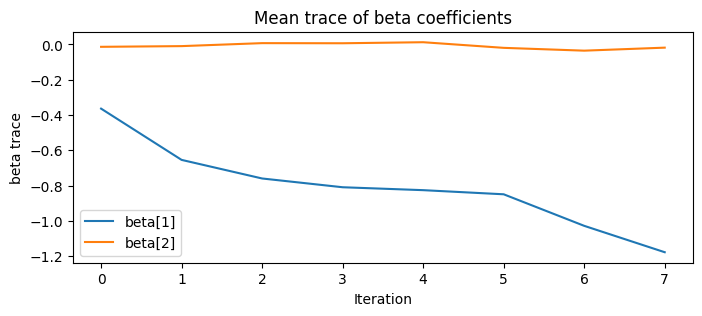

In [ ]:
import numpy as np
from scipy.stats import truncnorm, multivariate_normal, norm, beta
from numpy.linalg import inv
import matplotlib.pyplot as plt
from tqdm import trange

def sample_truncated_mvnorm(mean, cov, lower, upper):
    """
    Sample from truncated multivariate normal (Gibbs: coordinate-wise).
    Args:
      mean: (K,)
      cov: (K,K)
      lower: (K,)
      upper: (K,)
    Returns:
      x: (K,)
    """
    K = mean.shape[0]
    x = np.copy(mean)
    for k in range(K):
        mu_k = mean[k]
        # Add a small epsilon to the variance before taking the square root
        variance_k = cov[k, k]
        if variance_k <= 0:
            # Handle cases where variance is non-positive, e.g., use a tiny scale
            sigma_k = 1e-6 # Use a very small positive value
        else:
            sigma_k = np.sqrt(variance_k)

        a, b = (lower[k] - mu_k) / sigma_k, (upper[k] - mu_k) / sigma_k

        # Ensure finite bounds for truncnorm
        a = max(a, -1e6) # Prevent -inf
        b = min(b, 1e6)  # Prevent inf

        # Handle cases where truncation bounds are invalid (e.g., a >= b)
        if a >= b:
             # If bounds are invalid, sample from the mean or a small range around it
             # Or, more robustly, skip this dimension update in this iteration
             # For now, we can assign the mean or a truncated value if possible
             # print(f"Warning: Invalid truncation bounds for dimension {k}: a={a}, b={b}")
             # As a fallback, try sampling from a very narrow range if possible
             if np.isfinite(lower[k]) and np.isfinite(upper[k]) and lower[k] < upper[k]:
                  x[k] = truncnorm.rvs((lower[k] - mu_k) / sigma_k, (upper[k] - mu_k) / sigma_k, loc=mu_k, scale=sigma_k)
             elif np.isfinite(mu_k):
                  x[k] = mu_k # Fallback to the mean if bounds are problematic
             else:
                  x[k] = 0 # Default to 0 if mean is also problematic
        else:
            x[k] = truncnorm.rvs(a, b, loc=mu_k, scale=sigma_k)
    return x

def update_kappa(Xj, Yj, level, kappa):
    level = int(level)
    new_kappa = np.copy(kappa)
    for r in range(2, level):
        if (r + 1) >= len(kappa):
            continue
        left = max(np.max(Xj[Yj == r - 1]), kappa[r - 1])
        right = min(np.min(Xj[Yj == r]), kappa[r + 1])
        if left < right:
            new_kappa[r] = np.random.uniform(left, right)
        else:
            new_kappa[r] = (left + right) / 2
    return new_kappa



def DAG_ordinal(Y, simulate=1000, burnin=200, Break=2, verbose=True):
    """
    Input:
        Y: (n, K) array, ordinal data, values should be 1,...,Level_j for each column
        simulate: number of MC iterations
        burnin:     burn-in period
        Break:      how often to keep a sample after burnin
    Output:
        E.beta, E.L, E.P, E.G
    """
    n, K = Y.shape
    Level = np.max(Y, axis=0)  # array of levels for each var, shape (K,)
    # True DAG structure for simulation purposes (optional)
    Dag = np.zeros((K, K))
    Dag[4, 0] = 1  # Y1 -> Y5
    Dag[5, 1] = 1  # Y2 -> Y6
    Dag[4, 2] = 1; Dag[3, 2] = 1  # Y3 -> Y4,Y5
    Dag[5, 3] = 1  # Y4 -> Y6

    # Initialization
    beta_vec = np.zeros(K)  # mean for each variable
    kappa = []
    for j in range(K):
        if Level[j] > 2:
            # R code uses rordprobitGibbs, here we just spread cutpoints equally for start
            cuts = np.concatenate(([-np.inf], np.linspace(0, 1, int(Level[j] - 1)), [np.inf]))
        else:
            cuts = np.array([-np.inf, 0, np.inf])
        kappa.append(cuts)
    kappa = np.array(kappa, dtype=object)
    # Latents:
    X = np.random.randn(n, K)
    # Graph params (prior setup)
    L = np.eye(K)
    G = np.eye(K) * 2
    P = np.eye(K) * 2
    I_B = np.eye(K) * 1e-5

    # Store samples
    D_beta = []
    D_L = []
    D_P = []
    D_G = []
    D_kappa = [list() for _ in range(K)]
    trace_beta = []

    for R in trange(1, simulate + 1, desc='Gibbs Sampling'):
        # -- 1. Update X --
        Q = L.T @ L  # (K,K)
        # Add a small value to the diagonal of Q to prevent singularity
        Q = Q + np.eye(K) * 1e-8 # Added small perturbation
        inv_Q = inv(Q)
        for i in range(n):
            # For each observation, update X[i,:] given the others (Gibbs sweep)
            lo = np.zeros(K)
            up = np.zeros(K)
            for j in range(K):
                val = int(Y[i, j])  # level index
                lo[j] = kappa[j][val - 1]
                up[j] = kappa[j][val]
            mean = beta_vec
            cov = inv_Q  # Since X|. ~ N(mean, Q^{-1})
            X[i, :] = sample_truncated_mvnorm(mean, cov, lo, up)

        # -- 2. Update kappa (cut-points) --
        for j in range(K):
            if Level[j] > 2:
                kappa[j] = update_kappa(X[:, j], Y[:, j], Level[j] + 1, kappa[j])

        # -- 3. Update beta --
        # Add small perturbation to n*Q for stability if needed, though inv_Q should be stable now
        S = inv(n * Q + I_B)
        X_m = X.mean(axis=0)
        M = S @ (n * Q @ X_m + I_B @ beta_vec)
        beta_vec = multivariate_normal.rvs(mean=M, cov=S)

        # -- 4. Update L, G, P (Structure) --
        # similar to R code, although simplified
        for i in range(1, K):
            for j in range(i):
                # Full conditional for edge existence
                X_B = X[:, i] - beta_vec[i]
                X_parent = X[:, j] - beta_vec[j]
                bb = np.sum(X_B * X_parent)
                # Add small epsilon to aa to prevent division by zero
                aa = 0.1 + np.sum(X_parent ** 2) + 1e-8 # Added small perturbation
                ff = np.exp(0.5 * (bb ** 2) / aa)
                r_v = np.sqrt(0.1 / aa)
                prob0 = float(r_v * ff)
                prob1 = 1.0
                probs = np.array([prob0, prob1])
                if not np.isfinite(probs).all() or probs.sum() == 0:
                    probs = np.array([0.5, 0.5])
                probs /= probs.sum()
                g_sample = np.random.choice([0, 1], p=probs)
                P[i, j] = beta.rvs(1, 2) if g_sample == 0 else beta.rvs(1, 2)
                G[i, j] = g_sample
                L[i, j] = 0 if G[i, j] == 1 else np.random.normal(-bb / aa, np.sqrt(1 / aa))
        # Update Q for next sweep
        Q = L.T @ L

        # -- Monitoring & Saving --
        trace_beta.append(beta_vec.copy())
        if R > burnin and ((R-burnin) % Break == 0):
            D_beta.append(beta_vec.copy())
            D_L.append(L.copy().flatten())
            D_G.append(G.copy().flatten())
            D_P.append(P.copy().flatten())
            for j in range(K):
                D_kappa[j].append(kappa[j].copy())

    # === Results ===
    # Mean point estimates:
    E_beta = np.mean(np.array(D_beta), axis=0)
    E_L = np.mean(np.array(D_L), axis=0).reshape(K, K)
    E_G = np.mean(np.array(D_G), axis=0).reshape(K, K)
    E_P = np.mean(np.array(D_P), axis=0).reshape(K, K)
    if verbose:
        print(f"E.beta = {np.round(E_beta,2)}")
        print(f"E.L = \n{np.round(E_L,2)}")
        print(f"E.G = \n{np.round(E_G,2)}")
        print(f"E.P = \n{np.round(E_P,2)}")
    # Accuracy measures as in R code (for simulated DAG only)
    print("---- Structural accuracy (cut-off=0.5) ----")
    correct00, correct11, additional, missing = 0, 0, 0, 0
    for i in range(1, K):
        for j in range(i):
            if Dag[i, j] == 1 and E_G[i, j] < 0.5:
                correct11 += 1
            if Dag[i, j] == 0 and E_G[i, j] > 0.5:
                correct00 += 1
            if Dag[i, j] == 1 and E_G[i, j] > 0.5:
                missing += 1
            if Dag[i, j] == 0 and E_G[i, j] < 0.5:
                additional += 1
    totall = K * (K - 1) // 2
    print(f"correct00: {correct00}, correct11: {correct11}, additional: {additional}, missing: {missing}, accuracy: {(correct00 + correct11) / totall}")

    # (Add cut-off=0.4, 0.6, reporting as in R)
    # ... (similar block for .4 and .6 if needed)

    # Optional: plot trace of beta for convergence check
    plt.figure(figsize=(8, 3))
    trace_beta = np.array(trace_beta)
    for i in range(min(2, K)):
        plt.plot(trace_beta[:, i], label=f'beta[{i+1}]')
    plt.legend(); plt.xlabel('Iteration'); plt.ylabel('beta trace')
    plt.title("Mean trace of beta coefficients")
    plt.show()

    return E_beta, E_L, E_G, E_P, D_beta, trace_beta

# Example usage (load Y as a numpy array):
Y = np.loadtxt("learning5000.txt")[:, [2,5,0,1,3,4]]  # adjust indices if 0-based
E_beta, E_L, E_G, E_P, _, _ = DAG_ordinal(Y, simulate=8, burnin=4, Break=2)